# BUILD PREDICTIVE MODELS
## Weather Company Data Limited Edition: Sales Prediction using The Weather Company Data

### Data Disclaimer

The weather and business input data provided in this Accelerator is simulated data, designed to illustrate how to solve a common business problem. You are not permitted to utilize the simulated data contained in the Accelerator outside of this Accelerator or the Sample Materials contained within it.

### Copyright

This project contains Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2020. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.

### Terms and Conditions

The terms under which you are licensing IBM Cloud Pak for Data also apply to your use of the Industry Accelerators. 
 
Before you use the Industry Accelerators, you must agree on these additional terms and conditions that are set forth here.
 
This information contains sample modules, exercises, and code samples (the code may be provided in source code form (“Source Code”)) (collectively “Sample Materials”).

### License
 
Subject to the terms herein, you may copy, modify, and distribute these Sample Materials within your enterprise only, for your internal use only; provided such use is within the limits of the license rights of the IBM agreement under which you are licensing IBM Cloud Pak for Data.
 
The Industry Accelerators might include applicable third-party licenses. Review the third-party licenses before you use any of the Industry Accelerators. You can find the third-party licenses that apply to each Sample Material in the notices.txt file that is included with each Sample Material.

### Code Security
 
Source Code may not be disclosed to any third parties for any reason without IBM’s prior written consent, and access must be limited to your employees who have a need to know. 
 
You have implemented and will maintain the technical and personnel focused security policies, procedures, and controls that are necessary to protect the Source Code against loss, alteration, unlawful forms of processing, unauthorized disclosure, and unauthorized access.
 
You will promptly (and in no event any later than 48 hours) notify IBM after becoming aware of any breach or other security incident that you know, or should reasonably suspect, affects or will affect the Source Code or IBM, and will provide IBM with reasonably requested information about such security incident and the status of any remediation and restoration activities.
 
You will not permit any Source Code to reside on servers located in the Russian Federation, the People’s Republic of China, or any territories worldwide in which the Russian Federation or People’s Republic of China claim sovereignty (collectively, “China or Russia”).  Company shall not permit anyone to access or use any such Source Code from or within China or Russia, and Company will not permit any development, testing, or other work to occur in China or Russia that would require such access or use.  Upon reasonable written notice, IBM may extend these restrictions to other countries that the United States government identifies as potential cyber security concerns.
IBM may request that you verify compliance with these Code Security obligations, and you agree to cooperate with IBM in that regard.

### General
 
Notwithstanding anything to the contrary, IBM PROVIDES THE SAMPLE MATERIALS ON AN "AS IS" BASIS AND IBM DISCLAIMS ALL WARRANTIES, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY IMPLIED WARRANTIES OR CONDITIONS OF MERCHANTABILITY, SATISFACTORY QUALITY, FITNESS FOR A PARTICULAR PURPOSE, TITLE, AND ANY WARRANTY OR CONDITION OF NON-INFRINGEMENT. IBM SHALL NOT BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY OR ECONOMIC CONSEQUENTIAL DAMAGES ARISING OUT OF THE USE OR OPERATION OF THE SAMPLE MATERIALS. IBM SHALL NOT BE LIABLE FOR LOSS OF, OR DAMAGE TO, DATA, OR FOR LOST PROFITS, BUSINESS REVENUE, GOODWILL, OR ANTICIPATED SAVINGS. IBM HAS NO OBLIGATION TO PROVIDE MAINTENANCE, SUPPORT, UPDATES, ENHANCEMENTS OR MODIFICATIONS TO THE SAMPLE MATERIALS.


## Introduction

This notebook computes machine-learning models to predict daily product sales per location (place id) using coincident weather measurements and discount values. These models permit the identification or/and exploration of which weather variables most likely impact sales for a specific product across multiple business locations. Since product sales (target variable aka dependent variable) is a continuous-valued variable, the machine-learning models use regression algorithms to estimate predictive relationships. <br>

This notebook loads unprocessed datasets (i.e., *fauxweather1.csv* and *fauxsales1.csv*) then uses the analysis specifications of a configuration file (i.e., *STEP 0.1*) to sequentially (a) transform the data into apt modeling input data, (b) build multiple predictive models, (c) save the models, and (d) deploy the models for later application. The datasets and configuration file have storage in the `/project_data/data_asset/` directory of the provided WML CP4D project. Likewise, all notebooks have storage in the `/project_data/notebook/` directory of the provided WML CP4D project.


## Data Schemata

### Dataset: Faux Client Sales

**date:**  the daily date (string) ("%Y%m%d" format)<br>
**dateandtime:** the daily "date and time" timestamp (string) ("%Y%m%d %H:%M:%S" format)<br>
**placeId:** the ID of the place (e.g., branch, store, other locale) (string)<br>
**placeName:** the name of the place (e.g., branch, store, other locale) (string)<br>
**postalcode:** the postal code of the place (e.g., branch, store, other locale) (string)<br>
**countrycode:** the country of the place (e.g., branch, store, other locale) (string)<br>
**productname:** the name of the sold product (string)<br>
**producttype:** the type, category, or other product taxonomy/hierarchy level of the sold product (string)<br>
**discount:** the discount fraction of the sold product (float)<br>
**closed:** the daily status of the place being closed to not selling products (boolean) (True: place closed on date; False: place open on date)<br>
**sales:** the total product sales on the daily date (float)<br>

### Dataset: Faux TWC Weather
The weather data encompasses 11 weather aspects (i.e., MSLP; RelativeHumidity; Temperature; UVIndex; Dewpoint; FeelsLike; WindSpeed; Visibility; Gust; PrecipAmount; SnowAmount) (see below details on aspect descriptions), over 7 aggregation time periods (see below details on time interval descriptions), and exactly 3 aggregation functions (i.e., Avg, Max, Min).  Note: All variables (dataframe columns) with the ‘LocalDay’ time period record a ‘day’ as a "midnight to midnight" interval while all other columns represent a ‘day’ as a "7 am to 7 am" interval.  The following list completely annotates the entire measured weather-related variables: 

* DewpointLocalDayAvg, DewpointLocalDayMax, DewpointLocalDayMin, DewpointLocalDaytimeAvg, DewpointLocalDaytimeMax, DewpointLocalDaytimeMin, DewpointLocalNighttimeAvg, DewpointLocalNighttimeMax, DewpointLocalNighttimeMin, DewpointLocalMorningAvg, DewpointLocalMorningMax, DewpointLocalMorningMin, DewpointLocalAfternoonAvg, DewpointLocalAfternoonMax, DewpointLocalAfternoonMin, DewpointLocalEveningAvg, DewpointLocalEveningMax, DewpointLocalEveningMin, DewpointLocalOvernightAvg, DewpointLocalOvernightMax, DewpointLocalOvernightMin, FeelsLikeLocalDayAvg, FeelsLikeLocalDayMax, FeelsLikeLocalDayMin, FeelsLikeLocalDaytimeAvg, FeelsLikeLocalDaytimeMax, FeelsLikeLocalDaytimeMin, FeelsLikeLocalNighttimeAvg, FeelsLikeLocalNighttimeMax, FeelsLikeLocalNighttimeMin, FeelsLikeLocalMorningAvg, FeelsLikeLocalMorningMax, FeelsLikeLocalMorningMin, FeelsLikeLocalAfternoonAvg, FeelsLikeLocalAfternoonMax, FeelsLikeLocalAfternoonMin, FeelsLikeLocalEveningAvg, FeelsLikeLocalEveningMax, FeelsLikeLocalEveningMin, FeelsLikeLocalOvernightAvg, FeelsLikeLocalOvernightMax, FeelsLikeLocalOvernightMin, GustLocalDayAvg, GustLocalDayMax, GustLocalDayMin, GustLocalDaytimeAvg, GustLocalDaytimeMax, GustLocalDaytimeMin, GustLocalNighttimeAvg, GustLocalNighttimeMax, GustLocalNighttimeMin, GustLocalMorningAvg, GustLocalMorningMax, GustLocalMorningMin, GustLocalAfternoonAvg, GustLocalAfternoonMax, GustLocalAfternoonMin, GustLocalEveningAvg, GustLocalEveningMax, GustLocalEveningMin, GustLocalOvernightAvg, GustLocalOvernightMax, GustLocalOvernightMin, MSLPLocalDayAvg, MSLPLocalDayMax, MSLPLocalDayMin, MSLPLocalDaytimeAvg, MSLPLocalDaytimeMax, MSLPLocalDaytimeMin, MSLPLocalNighttimeAvg, MSLPLocalNighttimeMax, MSLPLocalNighttimeMin, MSLPLocalMorningAvg, MSLPLocalMorningMax, MSLPLocalMorningMin, MSLPLocalAfternoonAvg, MSLPLocalAfternoonMax, MSLPLocalAfternoonMin, MSLPLocalEveningAvg, MSLPLocalEveningMax, MSLPLocalEveningMin, MSLPLocalOvernightAvg, MSLPLocalOvernightMax, MSLPLocalOvernightMin, PrecipAmountLocalDayAvg, PrecipAmountLocalDayMax, PrecipAmountLocalDayMin, PrecipAmountLocalDaytimeAvg, PrecipAmountLocalDaytimeMax, PrecipAmountLocalDaytimeMin, PrecipAmountLocalNighttimeAvg, PrecipAmountLocalNighttimeMax, PrecipAmountLocalNighttimeMin, PrecipAmountLocalMorningAvg, PrecipAmountLocalMorningMax, PrecipAmountLocalMorningMin, PrecipAmountLocalAfternoonAvg, PrecipAmountLocalAfternoonMax, PrecipAmountLocalAfternoonMin, PrecipAmountLocalEveningAvg, PrecipAmountLocalEveningMax, PrecipAmountLocalEveningMin, PrecipAmountLocalOvernightAvg, PrecipAmountLocalOvernightMax, PrecipAmountLocalOvernightMin, RelativeHumidityLocalDayAvg, RelativeHumidityLocalDayMax, RelativeHumidityLocalDayMin, RelativeHumidityLocalDaytimeAvg, RelativeHumidityLocalDaytimeMax, RelativeHumidityLocalDaytimeMin, RelativeHumidityLocalNighttimeAvg, RelativeHumidityLocalNighttimeMax, RelativeHumidityLocalNighttimeMin, RelativeHumidityLocalMorningAvg, RelativeHumidityLocalMorningMax, RelativeHumidityLocalMorningMin, RelativeHumidityLocalAfternoonAvg, RelativeHumidityLocalAfternoonMax, RelativeHumidityLocalAfternoonMin, RelativeHumidityLocalEveningAvg, RelativeHumidityLocalEveningMax, RelativeHumidityLocalEveningMin, RelativeHumidityLocalOvernightAvg, RelativeHumidityLocalOvernightMax, RelativeHumidityLocalOvernightMin, SnowAmountLocalDayAvg, SnowAmountLocalDayMax, SnowAmountLocalDayMin, SnowAmountLocalDaytimeAvg, SnowAmountLocalDaytimeMax, SnowAmountLocalDaytimeMin, SnowAmountLocalNighttimeAvg, SnowAmountLocalNighttimeMax, SnowAmountLocalNighttimeMin, SnowAmountLocalMorningAvg, SnowAmountLocalMorningMax, SnowAmountLocalMorningMin, SnowAmountLocalAfternoonAvg, SnowAmountLocalAfternoonMax, SnowAmountLocalAfternoonMin, SnowAmountLocalEveningAvg, SnowAmountLocalEveningMax, SnowAmountLocalEveningMin, SnowAmountLocalOvernightAvg, SnowAmountLocalOvernightMax, SnowAmountLocalOvernightMin, TemperatureLocalDayAvg, TemperatureLocalDayMax, TemperatureLocalDayMin, TemperatureLocalDaytimeAvg, TemperatureLocalDaytimeMax, TemperatureLocalDaytimeMin, TemperatureLocalNighttimeAvg, TemperatureLocalNighttimeMax, TemperatureLocalNighttimeMin, TemperatureLocalMorningAvg, TemperatureLocalMorningMax, TemperatureLocalMorningMin, TemperatureLocalAfternoonAvg, TemperatureLocalAfternoonMax, TemperatureLocalAfternoonMin, TemperatureLocalEveningAvg, TemperatureLocalEveningMax, TemperatureLocalEveningMin, TemperatureLocalOvernightAvg, TemperatureLocalOvernightMax, TemperatureLocalOvernightMin, UVIndexLocalDayAvg, UVIndexLocalDayMax, UVIndexLocalDayMin, UVIndexLocalDaytimeAvg, UVIndexLocalDaytimeMax, UVIndexLocalDaytimeMin, UVIndexLocalNighttimeAvg, UVIndexLocalNighttimeMax, UVIndexLocalNighttimeMin, UVIndexLocalMorningAvg, UVIndexLocalMorningMax, UVIndexLocalMorningMin, UVIndexLocalAfternoonAvg, UVIndexLocalAfternoonMax, UVIndexLocalAfternoonMin, UVIndexLocalEveningAvg, UVIndexLocalEveningMax, UVIndexLocalEveningMin, UVIndexLocalOvernightAvg, UVIndexLocalOvernightMax, UVIndexLocalOvernightMin, VisibilityLocalDayAvg, VisibilityLocalDayMax, VisibilityLocalDayMin, VisibilityLocalDaytimeAvg, VisibilityLocalDaytimeMax, VisibilityLocalDaytimeMin, VisibilityLocalNighttimeAvg, VisibilityLocalNighttimeMax, VisibilityLocalNighttimeMin, VisibilityLocalMorningAvg, VisibilityLocalMorningMax, VisibilityLocalMorningMin, VisibilityLocalAfternoonAvg, VisibilityLocalAfternoonMax, VisibilityLocalAfternoonMin, VisibilityLocalEveningAvg, VisibilityLocalEveningMax, VisibilityLocalEveningMin, VisibilityLocalOvernightAvg, VisibilityLocalOvernightMax, VisibilityLocalOvernightMin, WindSpeedLocalDayAvg, WindSpeedLocalDayMax, WindSpeedLocalDayMin, WindSpeedLocalDaytimeAvg, WindSpeedLocalDaytimeMax, WindSpeedLocalDaytimeMin, WindSpeedLocalNighttimeAvg, WindSpeedLocalNighttimeMax, WindSpeedLocalNighttimeMin, WindSpeedLocalMorningAvg, WindSpeedLocalMorningMax, WindSpeedLocalMorningMin, WindSpeedLocalAfternoonAvg, WindSpeedLocalAfternoonMax, WindSpeedLocalAfternoonMin, WindSpeedLocalEveningAvg, WindSpeedLocalEveningMax, WindSpeedLocalEveningMin, WindSpeedLocalOvernightAvg, WindSpeedLocalOvernightMax, WindSpeedLocalOvernightMin


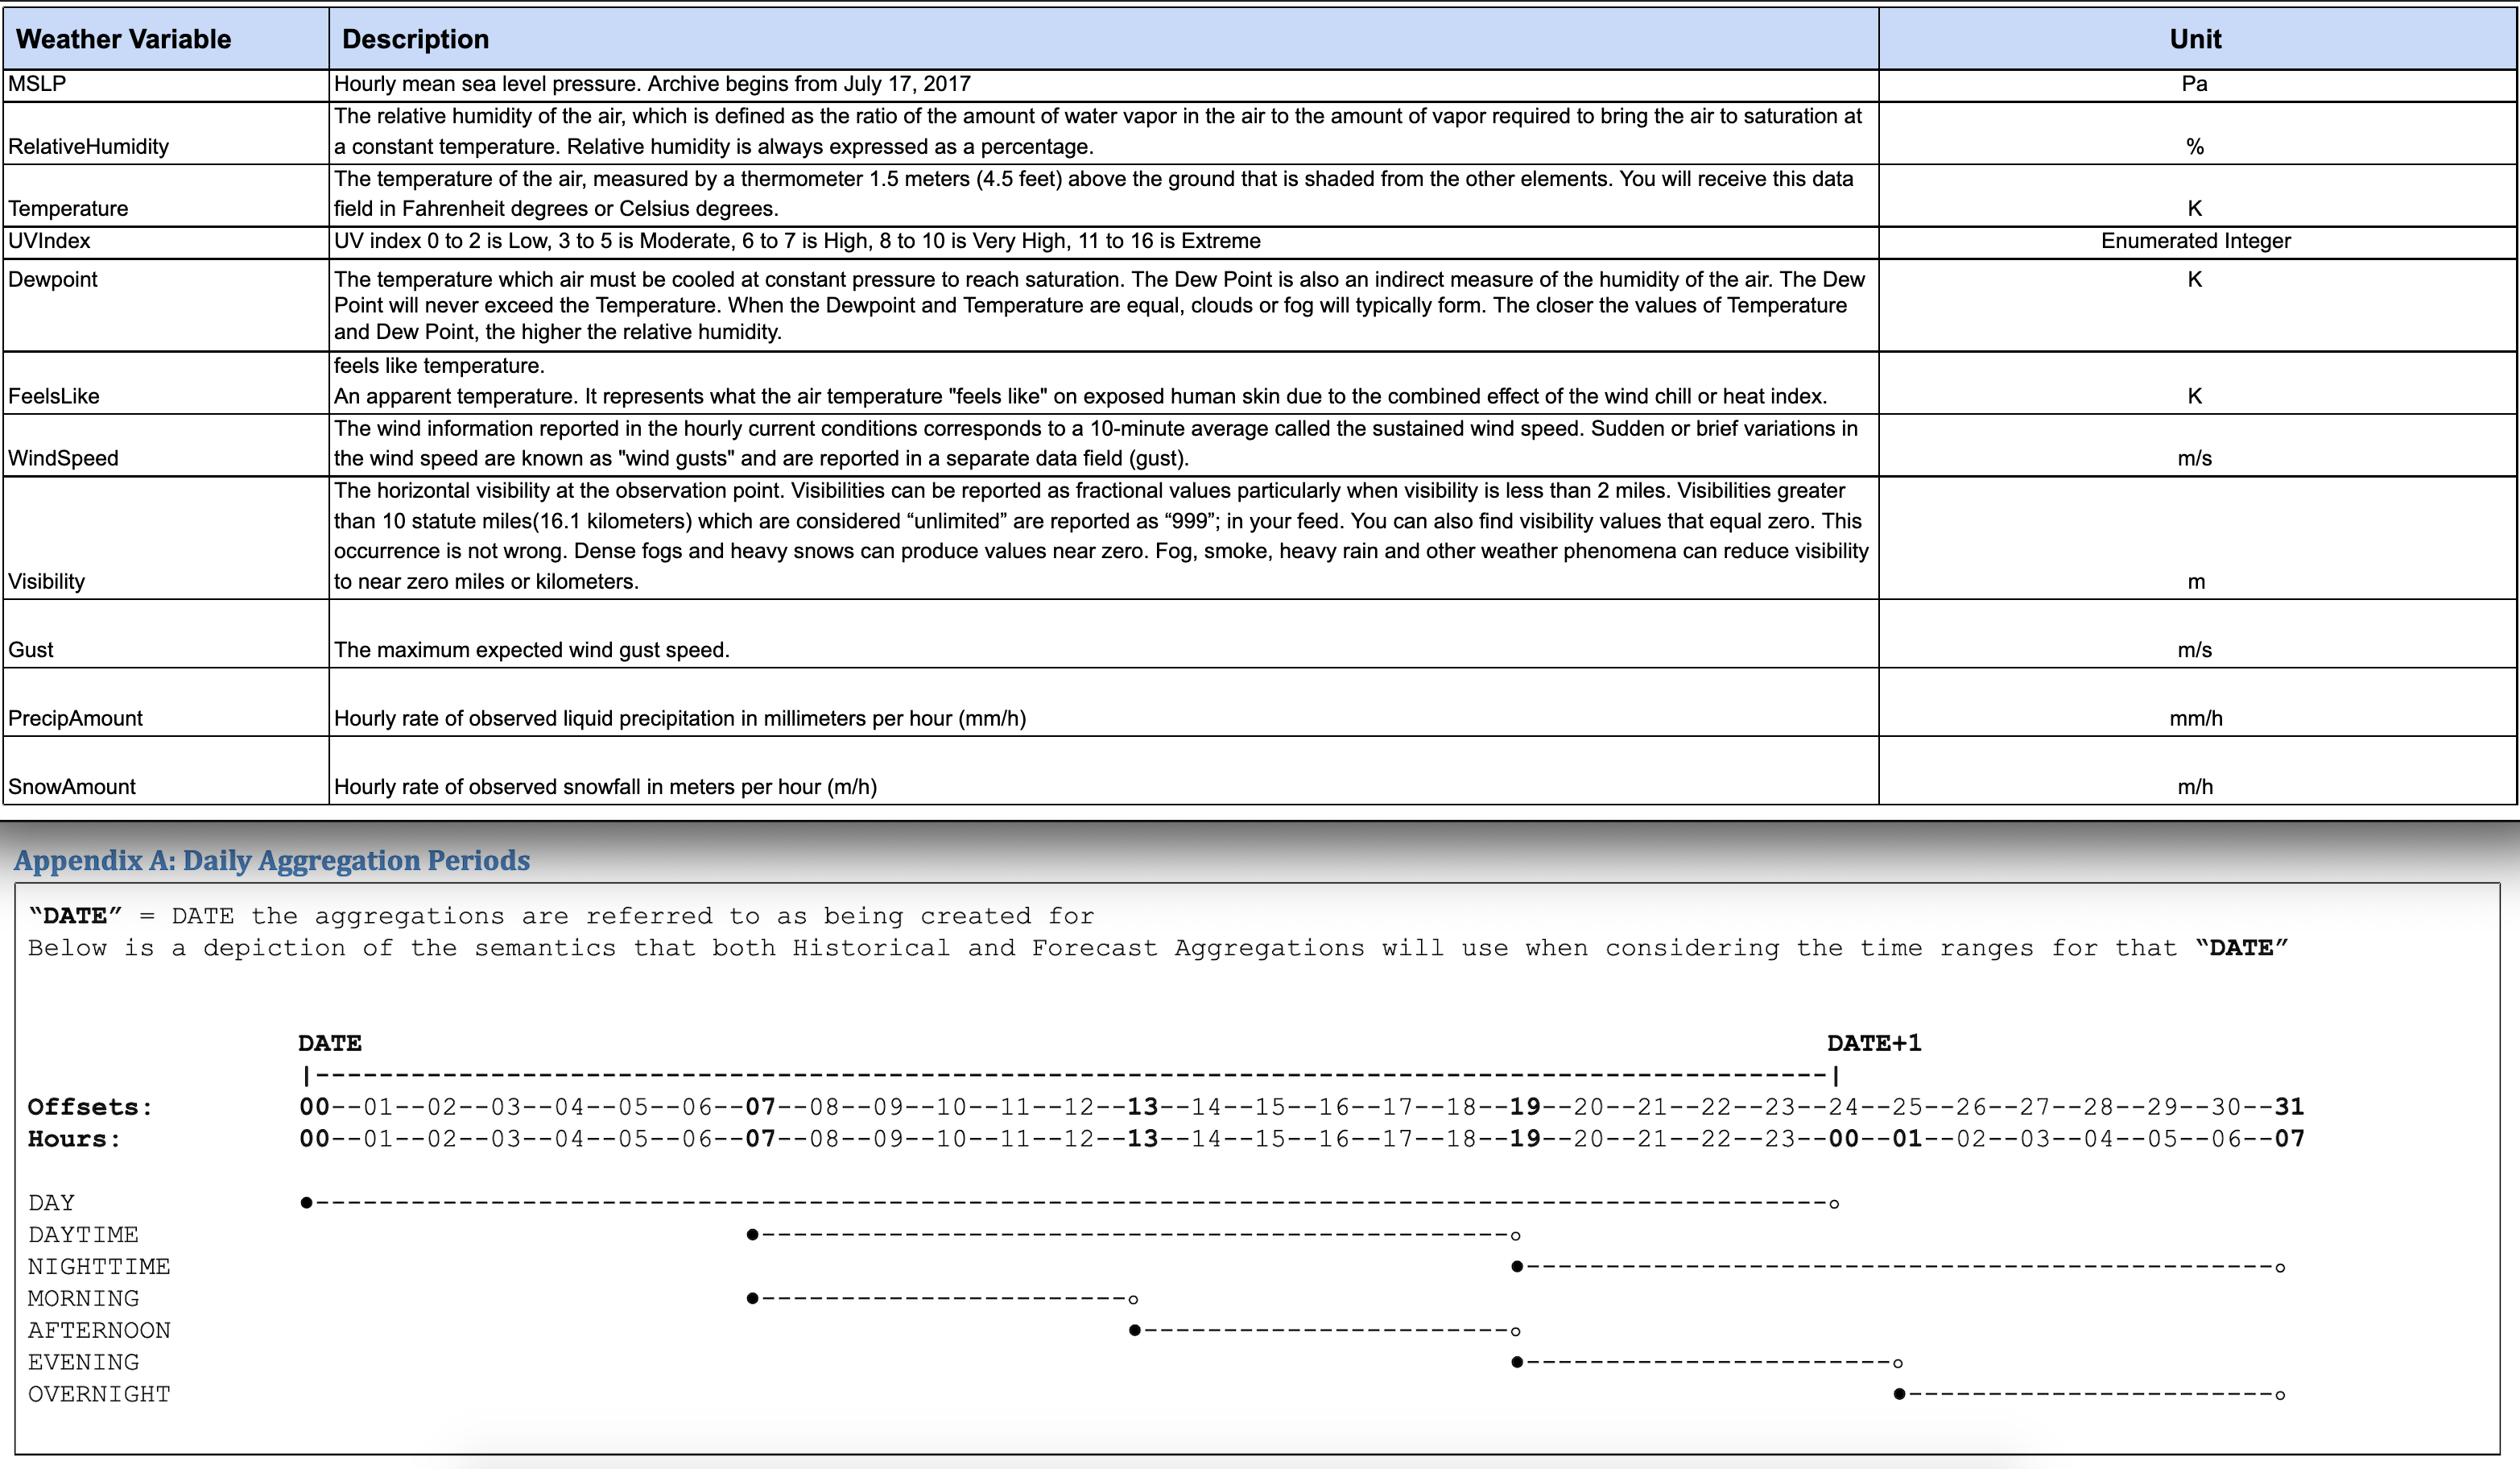

In [1]:
from IPython.display import display, Image
display(Image(filename='/project_data/data_asset/weatherdataSchema.png'))

# STEP 0.1: Configure Analysis: Import Software Packages, Set Parameters, and Define Custom Functions

The following cells configure the analysis (i.e., import python software packages, set predefined variables (aka "parameters" aka "settings"), and define custom functions).

In [2]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD ANALYSIS CONFIGURATION
# ----------------------------------------------------------------------------------------------------------------------

# import "sys" library
import sys

# add project data path
if "/project_data/data_asset" not in sys.path:
    sys.path.insert(0, "/project_data/data_asset")

    
# import configuration information
from config import *

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# define data files
loadfile1 = "/project_data/data_asset/fauxsales1.csv"
loadfile2 = "/project_data/data_asset/fauxweather1.csv"

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 0.1: Configure Analysis' analysis")
    

DONE: 'STEP 0.1a: Import Software Packages' analysis
DONE: 'STEP 0.1b: Set Parameters' analysis
DONE: 'STEP 0.1c: Define Custom Functions' analysis
DONE: 'STEP 0.1: Configure Analysis' analysis


# STEP 1.1: Evaluate Data
Ideally and Prospectively, this substep simply computes statistics (typically descriptive stats) including analytics-focused or/and business-focused "quality metrics" of the data variables (columns).

In [3]:

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

#
list_loadfile = [loadfile1, loadfile2]

#
for loadfilenow in list_loadfile:
    
    # load data
#     df = pd.read_csv(loadfilenow, dtype=dict_dtypes, parse_dates=[name_columndatetime])
    df = pd.read_csv(loadfilenow)
    
    # compute columnar quality metrics (e.g., nunique, isnan, dtype, min, max, kurtosis): merged client data
    mydfdescribe(df)


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.1: Evaluate Data' analysis")


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
date,int64,731,2193,0.0,0.0,0.000000,0.0,20160101,20171231,-1.982886
dateandtime,object,731,2193,0.0,0.0,0.000000,NaN,20160101 00:00:00,20171231 00:00:00,NaN
placeId,int64,3,2193,0.0,0.0,0.000000,0.0,78152,96468,-1.500685
placeName,object,3,2193,0.0,0.0,0.000000,NaN,place_078152,place_096468,NaN
postalcode,int64,3,2193,0.0,0.0,0.000000,0.0,65807,84123,-1.500685
countrycode,object,1,2193,0.0,0.0,0.000000,NaN,us,us,NaN
productname,object,1,2193,0.0,0.0,0.000000,NaN,thingamajig,thingamajig,NaN
producttype,object,1,2193,0.0,0.0,0.000000,NaN,categoryA,categoryA,NaN
discount,float64,3,2193,0.0,0.0,0.339717,0.0,0,0.2,-1.517852
closed,bool,2,2193,0.0,0.0,0.989056,0.0,False,True,86.586088


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
DewpointLocalAfternoonAvg,float64,1453,2193,0.0,0.0,0.0,0.011400,-1.563751e+01,7.292249e+01,-0.315214
DewpointLocalAfternoonMax,float64,397,2193,0.0,0.0,0.0,0.006384,-1.246042e+01,7.411958e+01,-0.365741
DewpointLocalAfternoonMin,float64,403,2193,0.0,0.0,0.0,0.002280,-1.058652e+01,8.157348e+01,-0.264868
DewpointLocalDayAvg,float64,1993,2193,0.0,0.0,0.0,0.001368,-2.442216e+00,8.548094e+01,-0.309612
DewpointLocalDayMax,float64,387,2193,0.0,0.0,0.0,0.004560,-1.381763e+01,7.276237e+01,-0.458122
DewpointLocalDayMin,float64,419,2193,0.0,0.0,0.0,0.042408,-3.143862e+01,6.918138e+01,-0.122416
DewpointLocalDaytimeAvg,float64,1772,2193,0.0,0.0,0.0,0.025536,-2.026114e+01,6.741385e+01,-0.331288
DewpointLocalDaytimeMax,float64,386,2193,0.0,0.0,0.0,0.000912,-4.058771e+00,8.252123e+01,-0.418973
DewpointLocalDaytimeMin,float64,416,2193,0.0,0.0,0.0,0.152759,-3.743458e+01,5.706542e+01,-0.210670
DewpointLocalEveningAvg,float64,1469,2193,0.0,0.0,0.0,0.029184,-3.168687e+01,6.812313e+01,-0.255538


DONE: 'STEP 1.1: Evaluate Data' analysis


# STEP 1.2: Transform Data
Typically, this substep derives new variables from the extant ones or/and aggregates values of variables by a single variable or a combination of chosen variables.

In [4]:
# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# NOTE: For most generality, the code likely must resume a "join all the data then aggregate it" approach rather
#     : than the current "aggregate non-weather data then join weather to it" approach that exploits a presumed
#     : "compute models per location" solution (especially since weather is a location-variant dataset).

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: client data
df1 = pd.read_csv(loadfile1, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

# compute independent variables: time-based variables
# todo: brainstorm more derived (extracted) variables
df1 = derivevariables_time(df1, name_columndatetime)

# compute aggregated variables: independent variables and dependent variables
df1 = df1.groupby(list_columnsgroupby, as_index=False).agg(dict_columnsagg_agg).\
    astype(dict_columnsdtypes_agg).\
    rename(columns=dict_columnsrename_agg).\
    reset_index(inplace=False, drop=True) # TODO: combine this with previous line

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: weather data
# TODO: update the hardcoded aspects here after above update of config variables
df2 = pd.read_csv(loadfile2, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2["dateW"] = pd.to_datetime(df2["dateW"], format="%Y%m%d").dt.date.astype("str")

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute data: merge client data, weather data, and postalcode data
# TODO: drop redundant columns via the data joins
df = df1.merge(df2, left_on=["date", "postalcode"], right_on=["dateW", "postalcodeW"], how=valu_howjoin)

# display data
df.head(n=valu_numrowshead)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.2: Transform Data' analysis")


,date,placeId,producttype,placeName,postalcode,minute,hour,weekday,day,month,quarter,year,discount,sales,dateW,postalcodeW,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,2016-01-01,078152,categoryA,place_078152,65807,0,0,6,1,1,1,2016,0.1,0.00,2016-01-01,65807,19.294962,13.980513,29.574154,33.848282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,35.408451,90.968269,58.350410,0.010339,25.651545,28.390444,32.289480,1.239738,8.665123,8.255852
1,2016-01-01,094352,categoryA,place_094352,82007,0,0,6,1,1,1,2016,0.1,0.00,2016-01-01,82007,-2.485020,-6.179487,15.714154,18.218306,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,24.008451,48.268269,38.833743,0.010339,14.851545,15.610444,20.739474,1.156404,8.665123,10.306436
2,2016-01-01,096468,categoryA,place_096468,84123,0,0,6,1,1,1,2016,0.1,0.00,2016-01-01,84123,-1.825032,-5.459487,21.294154,21.368306,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,33.308451,74.368269,51.325412,0.010339,10.891545,10.030444,15.249474,1.156404,9.503822,1.768552
3,2016-01-02,078152,categoryA,place_078152,65807,0,0,7,2,1,1,2016,0.1,26100.46,2016-01-02,65807,20.764968,17.220513,40.014154,42.203270,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,24.108451,80.668269,48.700412,0.010339,34.651545,31.270444,39.114468,1.323071,8.581911,8.628686
4,2016-01-02,094352,categoryA,place_094352,82007,0,0,7,2,1,1,2016,0.2,16744.62,2016-01-02,82007,2.314968,2.640513,27.954154,26.948270,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,21.408451,64.668269,39.817077,0.010339,22.951545,22.990444,26.799444,1.156404,8.500149,8.088077
5,2016-01-02,096468,categoryA,place_096468,84123,0,0,7,2,1,1,2016,0.0,13189.89,2016-01-02,84123,2.524974,-0.779487,20.034154,23.003282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,41.008451,70.368269,56.758743,0.010339,9.631545,15.610444,17.334450,0.823071,8.912222,1.805836
6,2016-01-03,078152,categoryA,place_078152,65807,0,0,1,3,1,1,2016,0.1,23733.78,2016-01-03,65807,22.205022,15.420513,33.894154,37.043282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,36.708451,94.568269,59.558747,0.010339,29.251545,30.190444,35.469468,1.323071,8.582636,9.579410
7,2016-01-03,094352,categoryA,place_094352,82007,0,0,1,3,1,1,2016,0.0,19114.13,2016-01-03,82007,7.504962,-2.579487,31.374154,31.298294,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,23.708451,71.768269,44.133743,0.010339,25.471545,17.590444,29.169468,1.156404,8.664760,6.037494
8,2016-01-03,096468,categoryA,place_096468,84123,0,0,1,3,1,1,2016,0.2,17939.14,2016-01-03,84123,10.954950,9.840513,24.174154,28.223282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,43.708451,70.868269,59.433742,0.010339,14.131545,25.330444,24.084504,0.823071,8.334450,3.259886
9,2016-01-04,078152,categoryA,place_078152,65807,0,0,2,4,1,1,2016,0.0,19060.57,2016-01-04,65807,17.104974,10.560513,30.474154,29.393282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,41.008451,84.868269,63.192077,0.010339,20.251545,28.570444,27.894474,1.073071,8.162485,6.801802


DONE: 'STEP 1.2: Transform Data' analysis


# STEP 1.3: Explore Data
Typically, this substep involves basic inital tabulations, histograms, correlations, time-series plots, etcetera.

Text(0.5, 1.0, 'DewpointLocalMorningAvg')

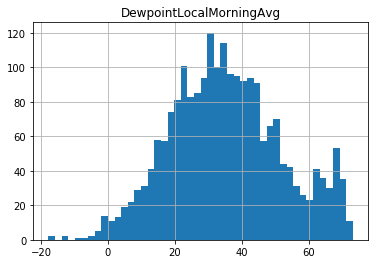

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeAvg')

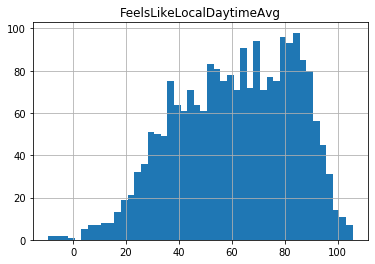

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeMax')

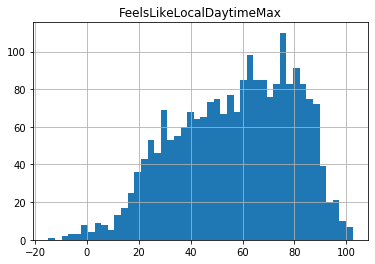

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeMin')

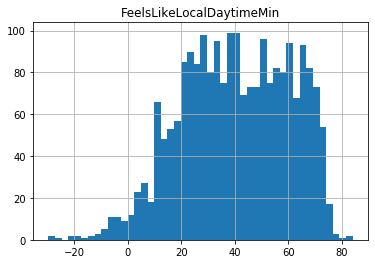

Text(0.5, 1.0, 'GustLocalDayMax')

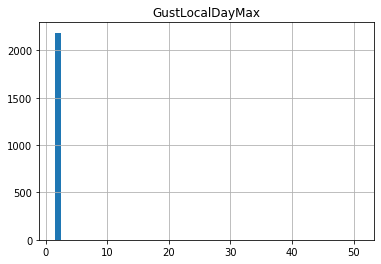

Text(0.5, 1.0, 'GustLocalDaytimeAvg')

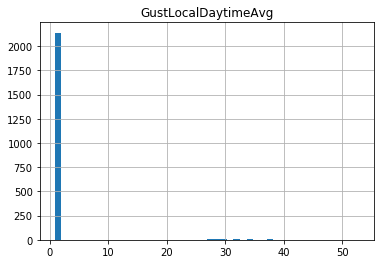

Text(0.5, 1.0, 'GustLocalMorningAvg')

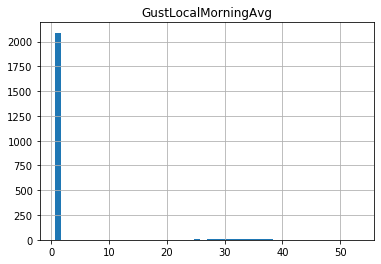

Text(0.5, 1.0, 'PrecipAmountLocalDayAvg')

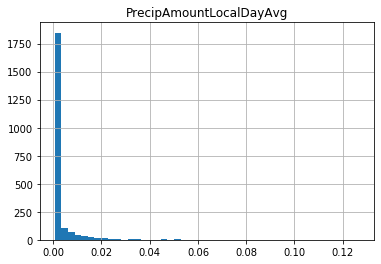

Text(0.5, 1.0, 'PrecipAmountLocalDayMax')

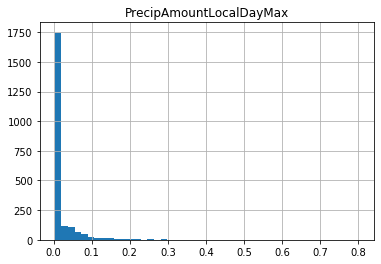

Text(0.5, 1.0, 'PrecipAmountLocalDayMin')

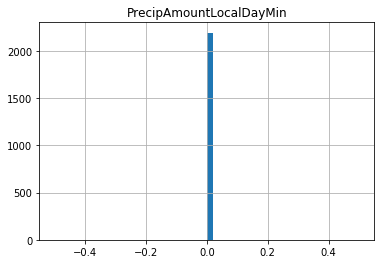

Text(0.5, 1.0, 'PrecipAmountLocalDaytimeAvg')

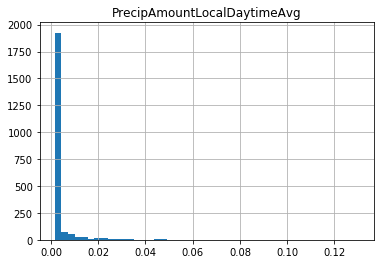

Text(0.5, 1.0, 'PrecipAmountLocalEveningAvg')

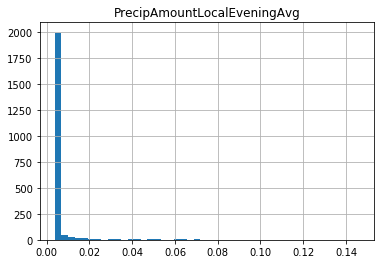

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeAvg')

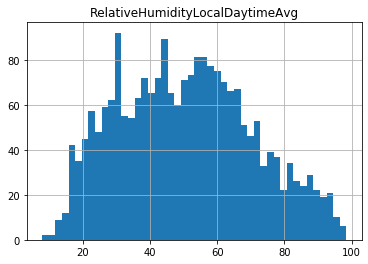

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeMax')

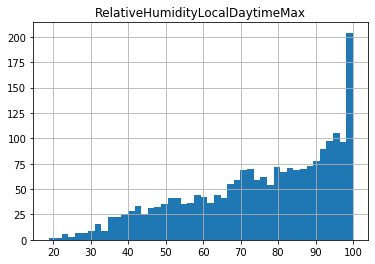

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeMin')

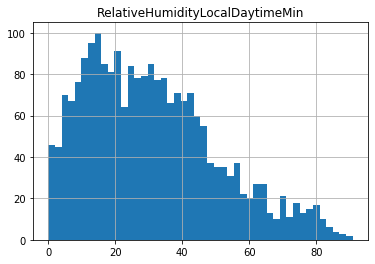

Text(0.5, 1.0, 'SnowAmountLocalDayMax')

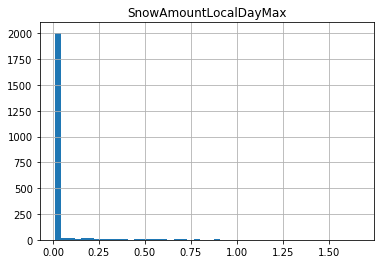

Text(0.5, 1.0, 'TemperatureLocalDaytimeAvg')

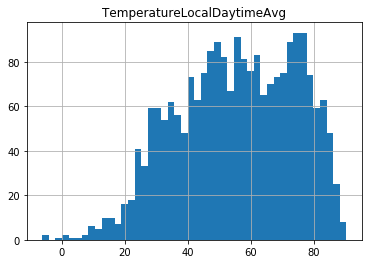

Text(0.5, 1.0, 'TemperatureLocalDaytimeMax')

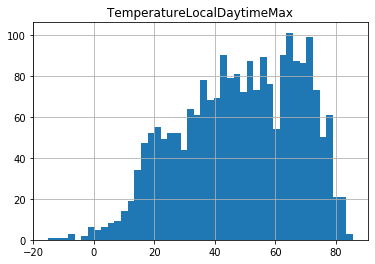

Text(0.5, 1.0, 'TemperatureLocalDaytimeMin')

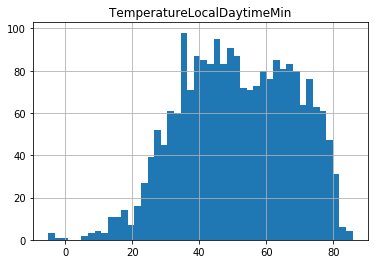

Text(0.5, 1.0, 'UVIndexLocalDaytimeAvg')

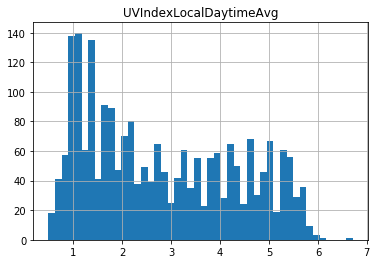

Text(0.5, 1.0, 'VisibilityLocalDaytimeAvg')

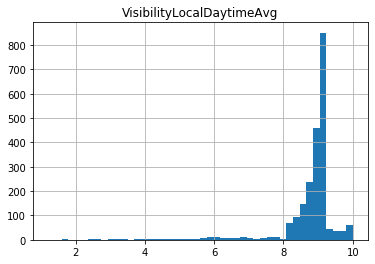

Text(0.5, 1.0, 'WindSpeedLocalDaytimeAvg')

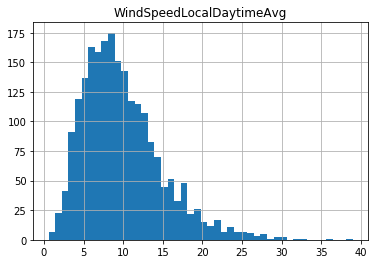

Text(0.5, 1.0, 'day')

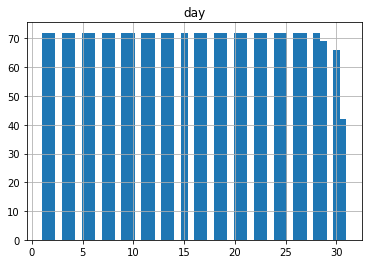

Text(0.5, 1.0, 'discount')

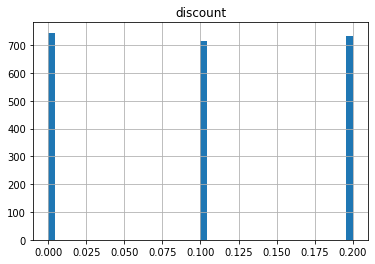

Text(0.5, 1.0, 'hour')

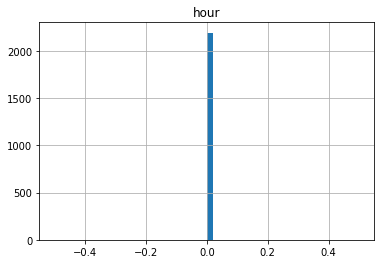

Text(0.5, 1.0, 'minute')

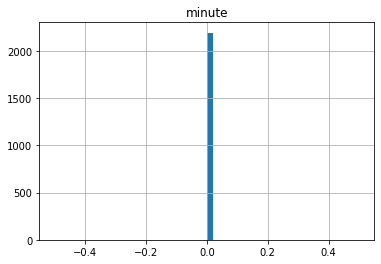

Text(0.5, 1.0, 'month')

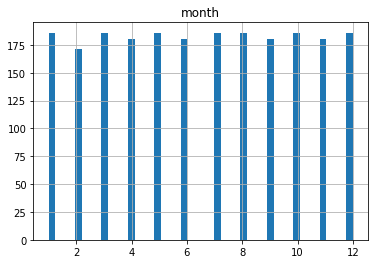

Text(0.5, 1.0, 'quarter')

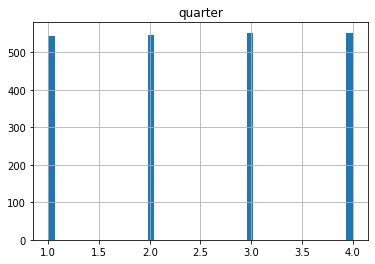

Text(0.5, 1.0, 'sales')

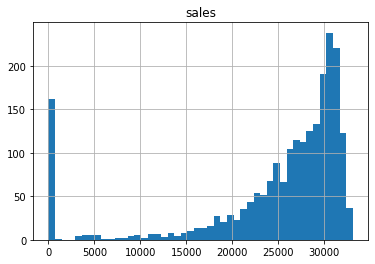

Text(0.5, 1.0, 'weekday')

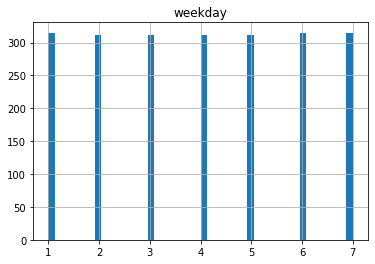

Text(0.5, 1.0, 'year')

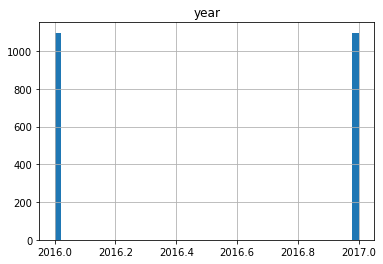

Text(0.5, 1.0, 'date')

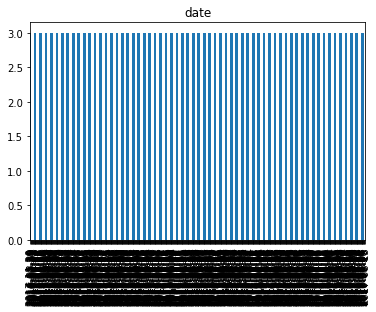

Text(0.5, 1.0, 'dateW')

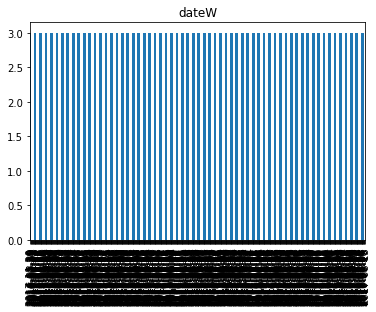

Text(0.5, 1.0, 'placeId')

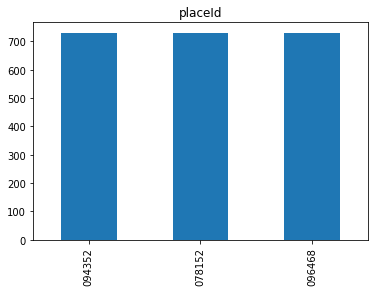

Text(0.5, 1.0, 'placeName')

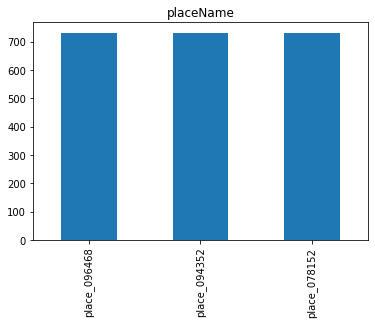

Text(0.5, 1.0, 'postalcode')

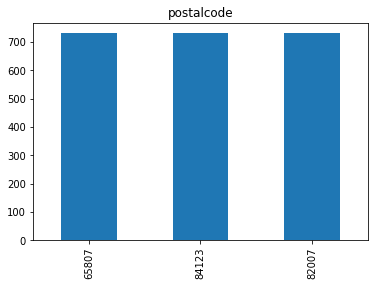

Text(0.5, 1.0, 'postalcodeW')

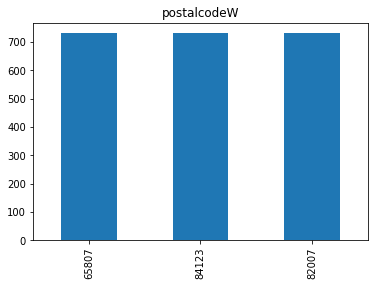

Text(0.5, 1.0, 'producttype')

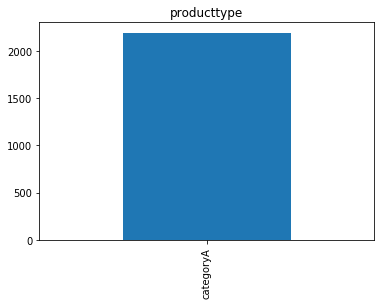

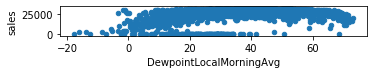

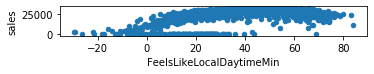

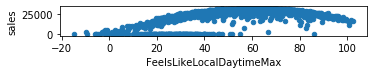

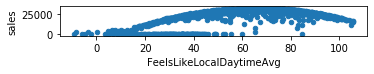

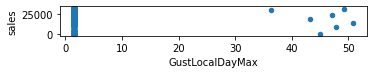

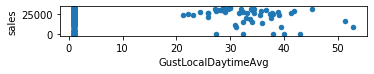

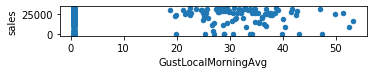

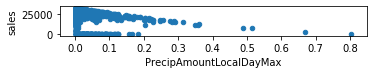

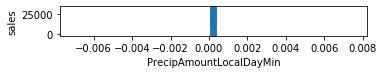

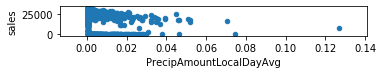

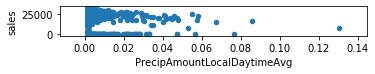

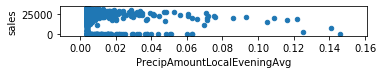

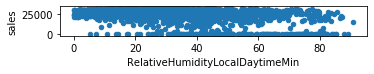

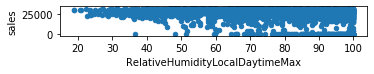

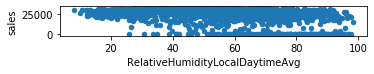

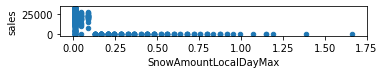

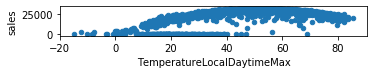

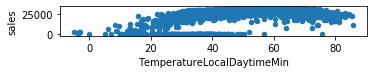

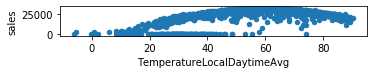

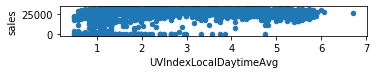

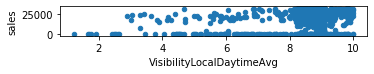

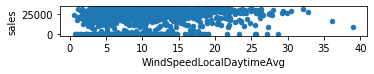

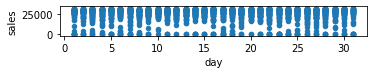

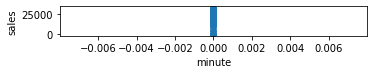

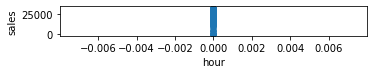

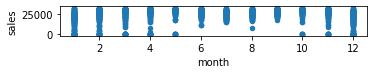

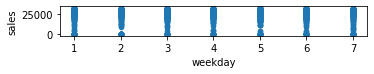

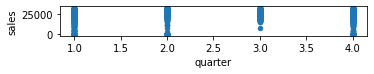

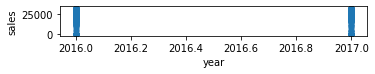

{'sales': 'mean'}
{'DewpointLocalMorningAvg': 'mean', 'FeelsLikeLocalDaytimeMin': 'mean', 'FeelsLikeLocalDaytimeMax': 'mean', 'FeelsLikeLocalDaytimeAvg': 'mean', 'GustLocalDayMax': 'mean', 'GustLocalDaytimeAvg': 'mean', 'GustLocalMorningAvg': 'mean', 'PrecipAmountLocalDayMax': 'mean', 'PrecipAmountLocalDayMin': 'mean', 'PrecipAmountLocalDayAvg': 'mean', 'PrecipAmountLocalDaytimeAvg': 'mean', 'PrecipAmountLocalEveningAvg': 'mean', 'RelativeHumidityLocalDaytimeMin': 'mean', 'RelativeHumidityLocalDaytimeMax': 'mean', 'RelativeHumidityLocalDaytimeAvg': 'mean', 'SnowAmountLocalDayMax': 'mean', 'TemperatureLocalDaytimeMax': 'mean', 'TemperatureLocalDaytimeMin': 'mean', 'TemperatureLocalDaytimeAvg': 'mean', 'UVIndexLocalDaytimeAvg': 'mean', 'VisibilityLocalDaytimeAvg': 'mean', 'WindSpeedLocalDaytimeAvg': 'mean'}
{'date': 'count'}
combo columns: ['producttype', 'placeId']
(3, 26) [1, 3] 3


,producttype,placeId,samplesize,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,categoryA,078152,731,26060.644268,46.233637,46.479008,63.629366,67.537792,1.502404,1.313878,1.296265,0.026891,0.000235,0.003283,0.003813,0.006354,40.011734,87.280841,61.131025,0.016479,53.138604,56.630991,60.303097,2.937084,8.803182,9.593702
1,categoryA,094352,731,23984.502531,26.912347,32.851949,50.107205,54.240844,1.830457,2.606236,3.739698,0.014013,0.000235,0.002103,0.003012,0.005437,24.901883,68.679118,44.033363,0.059673,43.101203,45.885656,50.298887,2.793982,8.692582,12.457979
2,categoryA,096468,731,24642.982558,33.256174,41.800239,57.890789,62.236863,1.454665,1.181589,1.232021,0.016372,0.000235,0.002672,0.003671,0.005956,27.902886,68.849772,46.776147,0.041038,48.744733,51.858159,55.819857,2.705181,8.716538,7.677944


{'date': 'count', 'placeId': <function <lambda> at 0x7f9ae51dd7b8>}
combo columns: ['producttype']
(1, 26) [1] 1


,producttype,samplesize,placeId,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,categoryA,2193,"[096468, 094352, 078152]",24896.043119,35.467386,40.377065,57.20912,61.3385,1.595842,1.700568,2.089328,0.019092,0.000235,0.002686,0.003499,0.005916,30.938834,74.936577,50.646845,0.039064,48.32818,51.458269,55.473947,2.812082,8.737434,9.909875


{'date': 'count', 'producttype': <function <lambda> at 0x7f9ae51ddc80>}
combo columns: ['placeId']
(3, 26) [3] 3


,placeId,samplesize,producttype,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,078152,731,[categoryA],26060.644268,46.233637,46.479008,63.629366,67.537792,1.502404,1.313878,1.296265,0.026891,0.000235,0.003283,0.003813,0.006354,40.011734,87.280841,61.131025,0.016479,53.138604,56.630991,60.303097,2.937084,8.803182,9.593702
1,094352,731,[categoryA],23984.502531,26.912347,32.851949,50.107205,54.240844,1.830457,2.606236,3.739698,0.014013,0.000235,0.002103,0.003012,0.005437,24.901883,68.679118,44.033363,0.059673,43.101203,45.885656,50.298887,2.793982,8.692582,12.457979
2,096468,731,[categoryA],24642.982558,33.256174,41.800239,57.890789,62.236863,1.454665,1.181589,1.232021,0.016372,0.000235,0.002672,0.003671,0.005956,27.902886,68.849772,46.776147,0.041038,48.744733,51.858159,55.819857,2.705181,8.716538,7.677944


DONE: 'STEP 1.3: Explore Data' analysis


In [5]:

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute number of dependent variables
num_dvariables = len(list_variablesdependent)

#
list_columnsall = df.columns.to_list()
list_columnsnumerical = sorted(df.select_dtypes(include=['float64', 'int64']).columns.to_list())
list_columnscategorical = sorted(list(set(list_columnsall) - set(list_columnsnumerical)))
valu_numrows = df.shape[0]

#
for colnow in list_columnsnumerical:    
    df[colnow].hist(bins=int(math.sqrt(valu_numrows)))
    plt.title(colnow)
    plt.show()
    
#
for colnow in list_columnscategorical:    
    df[colnow].value_counts().plot(kind="bar")
    plt.title(colnow)
    plt.show()
    
#
for colnow in list_colpick_weather + list_columnsother:
    fig, figaxes = plt.subplots(1, num_dvariables, figsize=(5 * num_dvariables, num_dvariables));
    fig.tight_layout()
    
    #
    # note: if ~isinstance(figaxes, Iterable) then figaxes = (figaxes, )
    if num_dvariables == 1:
        figaxes = [figaxes]
    
    for axnow, dvnow in zip(figaxes, list_variablesdependent):
        df[[dvnow, colnow]].plot(ax=axnow, kind='scatter', y=dvnow, x=colnow)
    
    plt.subplots_adjust(wspace=0.55)
    plt.show()
    

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

#
dict_columnsagg_part2 = {}
for ii in list_variablesdependent:
    dict_columnsagg_part2.update({ii: "mean"})

print(dict_columnsagg_part2)

#
dict_columnsagg_part3 = {}
for ii in list_colpick_weather:
    dict_columnsagg_part3.update({ii: "mean"})

print(dict_columnsagg_part3)


#
for rr in range(len(list_columnscomboby), 0, -1):

    list_combos = list(itertools.combinations(list_columnscomboby, rr))
    
    for combo_now in list_combos:
        
        #
        list_columnscomboby_now = list(combo_now)
        list_columnstolambda = list(set(list_columnscomboby) - set(list_columnscomboby_now))
        
        #
        dict_columnsagg_part1 = {"date": "count"}
        for ii in list_columnstolambda:
            dict_columnsagg_part1.update({ii: lambda x: list(set(x))})

        print(dict_columnsagg_part1)

        #
        dict_columnsagg_full = {}
        dict_columnsagg_full.update(dict_columnsagg_part1)
        dict_columnsagg_full.update(dict_columnsagg_part2)
        dict_columnsagg_full.update(dict_columnsagg_part3)

        #
        dfA = df.groupby(list_columnscomboby_now, as_index=False).agg(dict_columnsagg_full).\
            reset_index(inplace=False, drop=True).\
            rename(columns={"date": "samplesize"})

        #
        temp = df.loc[:, list_columnscomboby_now].nunique().tolist()
        print("combo columns: " + str(list_columnscomboby_now))
        print(dfA.shape, temp, np.prod(temp))
#         mydfdescribe(dfA)
        display(dfA.sort_values(by=list_columnscomboby_now, ascending=[True]*len(list_columnscomboby_now)))


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.3: Explore Data' analysis")


# STEP 2.1: Build Predictive Models

This step builds machine-learning-based predictive models using the specified algorithms in the *list_mla* configuration and the data computed by the *makedatastrata* function as inputs to the *makemodels* function. The *makedatastrata* function divides the entire original data according to all combinations of the unique values from the variables in the *list_columnsstratby* configuration, thereby computing a list of datasets with each list item is a data strata corresponding to a combination. Changing the *list_mla* configuration parameter facilitates trying different model types. But presently this example builds models using each the following two algorithms with basic arbitrary parameters (rather than optimized parameters for instance via a grid search algorithm) for model estimation (aka tuning aka data fitting).

 1. Linear Support Vector Machine Regressor
 2. Random Forests Regressor

The *makemodels* code splits each stratified dataset into a model training dataset (i.e., ~75% of the sample data) and a model testing dataset (i.e., ~25% of the sample data) to both estimate a model with the training data then evaluate the estimated model with the testing data.  The evaluation analysis encompasses the n-fold crossvalidation technique to tune each model whereby the *num_cvrepeats* configuration specifies the n (number of folds) of the n-fold process. The function also finds the best-performing crossvalidated model per machine-learning algorithm via a score (aka objective function) specified by the *valu_metricpickbestmodel* configuration. The code also displays some model estimation results during computation. Lastly, the *makemodels* function builds each model and returns the process results as a dictionary (*dict_results* in the above function) with the following various content. Each dictionary is an element in a list of all results spanning the combinations of stratified dataset and machine-learning algorithm.

    dict_results["name_data"] is a string identifying the stratified dataset as model input data
    dict_results["variables_independent"] is a list of independent variables in the model input data
    dict_results["variable_dependent"] = is a string naming the dependent variable for model prediction 
    dict_results["datascaler"] = is an object that scales each independent variable of model input data
    dict_results["name_mla"] = is a string naming the machine-learning algorithm that made the model
    dict_results["cvresults_models"] = is a list of crossvalidation results each item a dictionary of model info
    dict_results["cvresults_modelbest"] = is a dictionary of the best crossvalidation result model
    dict_results["cvresults_modelbestscore"] = is a float of the best crossvalidation result model score
    dict_results["cvresults_modelbestindex"] = is a float of the best crossvalidation result model score index

This step builds only six total models (i.e., the first three strata per the two machine-learing algorithms) for demonstrative purposes.

dataset size (dfM): (2193, 34)


,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg,sales,placeId,minute,hour,weekday,day,month,quarter,year,date,group,columns_ohe
0,19.294962,13.980513,29.574154,33.848282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,35.408451,90.968269,58.350410,0.010339,25.651545,28.390444,32.289480,1.239738,8.665123,8.255852,0.00,078152,0,0,6,1,1,1,2016,2016-01-01,"(078152,)",NaN
1,-2.485020,-6.179487,15.714154,18.218306,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,24.008451,48.268269,38.833743,0.010339,14.851545,15.610444,20.739474,1.156404,8.665123,10.306436,0.00,094352,0,0,6,1,1,1,2016,2016-01-01,"(094352,)",NaN
2,-1.825032,-5.459487,21.294154,21.368306,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,33.308451,74.368269,51.325412,0.010339,10.891545,10.030444,15.249474,1.156404,9.503822,1.768552,0.00,096468,0,0,6,1,1,1,2016,2016-01-01,"(096468,)",NaN
3,20.764968,17.220513,40.014154,42.203270,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,24.108451,80.668269,48.700412,0.010339,34.651545,31.270444,39.114468,1.323071,8.581911,8.628686,26100.46,078152,0,0,7,2,1,1,2016,2016-01-02,"(078152,)",NaN
4,2.314968,2.640513,27.954154,26.948270,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,21.408451,64.668269,39.817077,0.010339,22.951545,22.990444,26.799444,1.156404,8.500149,8.088077,16744.62,094352,0,0,7,2,1,1,2016,2016-01-02,"(094352,)",NaN
5,2.524974,-0.779487,20.034154,23.003282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,41.008451,70.368269,56.758743,0.010339,9.631545,15.610444,17.334450,0.823071,8.912222,1.805836,13189.89,096468,0,0,7,2,1,1,2016,2016-01-02,"(096468,)",NaN
6,22.205022,15.420513,33.894154,37.043282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,36.708451,94.568269,59.558747,0.010339,29.251545,30.190444,35.469468,1.323071,8.582636,9.579410,23733.78,078152,0,0,1,3,1,1,2016,2016-01-03,"(078152,)",NaN
7,7.504962,-2.579487,31.374154,31.298294,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,23.708451,71.768269,44.133743,0.010339,25.471545,17.590444,29.169468,1.156404,8.664760,6.037494,19114.13,094352,0,0,1,3,1,1,2016,2016-01-03,"(094352,)",NaN
8,10.954950,9.840513,24.174154,28.223282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,43.708451,70.868269,59.433742,0.010339,14.131545,25.330444,24.084504,0.823071,8.334450,3.259886,17939.14,096468,0,0,1,3,1,1,2016,2016-01-03,"(096468,)",NaN
9,17.104974,10.560513,30.474154,29.393282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,41.008451,84.868269,63.192077,0.010339,20.251545,28.570444,27.894474,1.073071,8.162485,6.801802,19060.57,078152,0,0,2,4,1,1,2016,2016-01-04,"(078152,)",NaN


dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_demo_('078152',); sample size: 731
dataset: clientname_demo_('094352',); sample size: 731
dataset: clientname_demo_('096468',); sample size: 731
elapsed time of makedatastrata: 1.4232537746429443
sample size of group clientname_demo_('078152',): 731

dependent variable (aka criterion variable): SALES
any nan: False ;  all finite: True
any nan: False ;  all finite: True
mla: SVR

{'fit_time': array([0.0289979 , 0.04996896, 0.0263896 , 0.0208528 , 0.05455947]), 'score_time': array([0.0037446 , 0.00220251, 0.00231481, 0.00221229, 0.00239444]), 'estimator': (SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, ca

{'fit_time': array([0.12563801, 0.06430459, 0.0924592 , 0.04685545, 0.08934331]), 'score_time': array([0.00240803, 0.00266981, 0.00233603, 0.00221086, 0.00239372]), 'estimator': (SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)), 'test_neg_mean_absolute_error': array([-3536.21832538, -3824

{'fit_time': array([0.16088319, 0.07411861, 0.06110692, 0.07307243, 0.0747385 ]), 'score_time': array([0.00322104, 0.00228024, 0.00252891, 0.00234461, 0.00261903]), 'estimator': (SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)), 'test_neg_mean_absolute_error': array([-2663.61429505, -4374

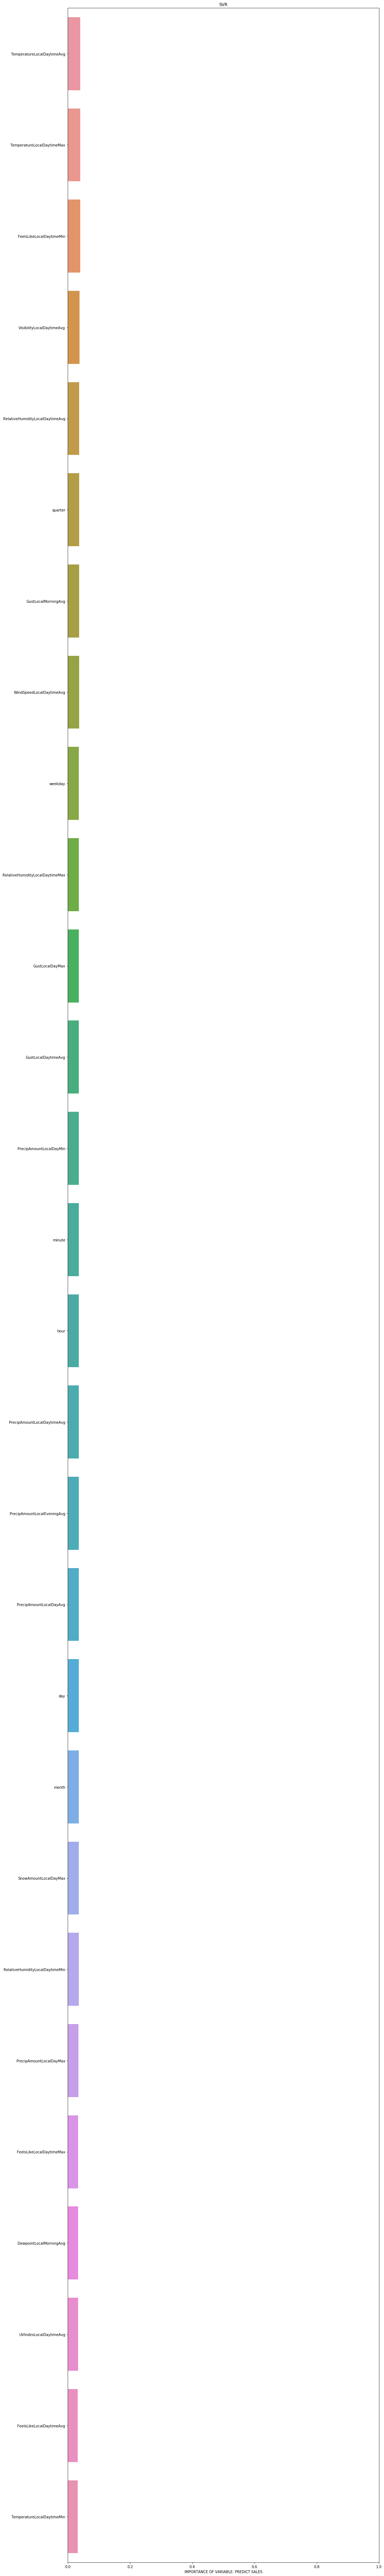

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 2956.028203302997, 'mape': inf, 'rms': 4622.8047668566005, 'mse': 21370323.912472107, 'vs': 0.38828673353624255, 'r2': 0.36519739770090753}


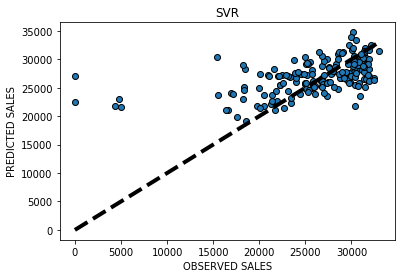

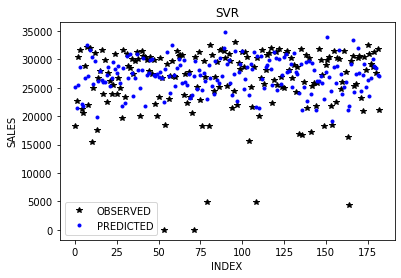

permuted neg_median_absolute_error: -2401.571575261508 (p = 0.09090909090909091, n = 10)


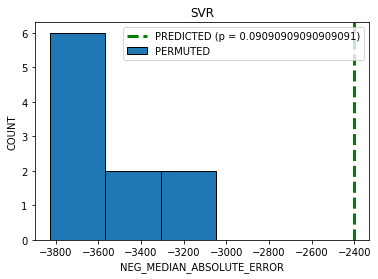

clientname_demo_('078152',) sales RANDOMFOREST 763.3191666666662


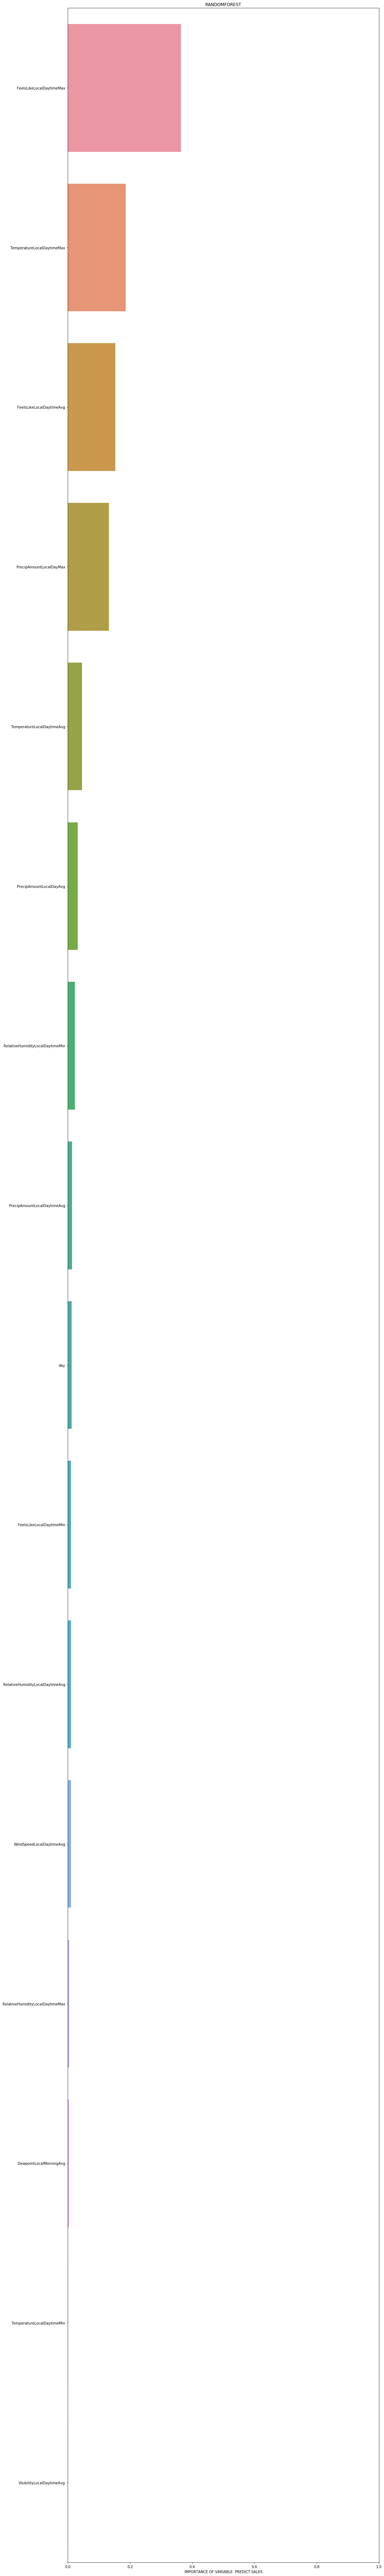

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 1036.9365755919855, 'mape': nan, 'rms': 1517.2671067627903, 'mse': 2302099.4732643287, 'vs': 0.9338301211564765, 'r2': 0.9316164442633141}


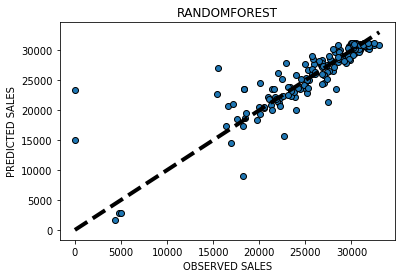

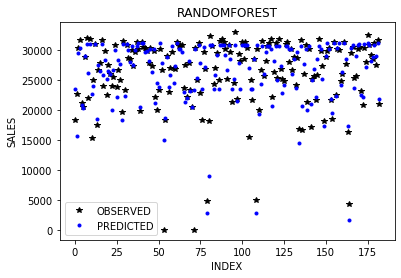

permuted neg_median_absolute_error: -738.3944999999997 (p = 0.09090909090909091, n = 10)


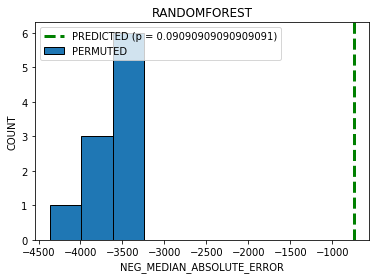

clientname_demo_('094352',) sales SVR 1905.186164379702


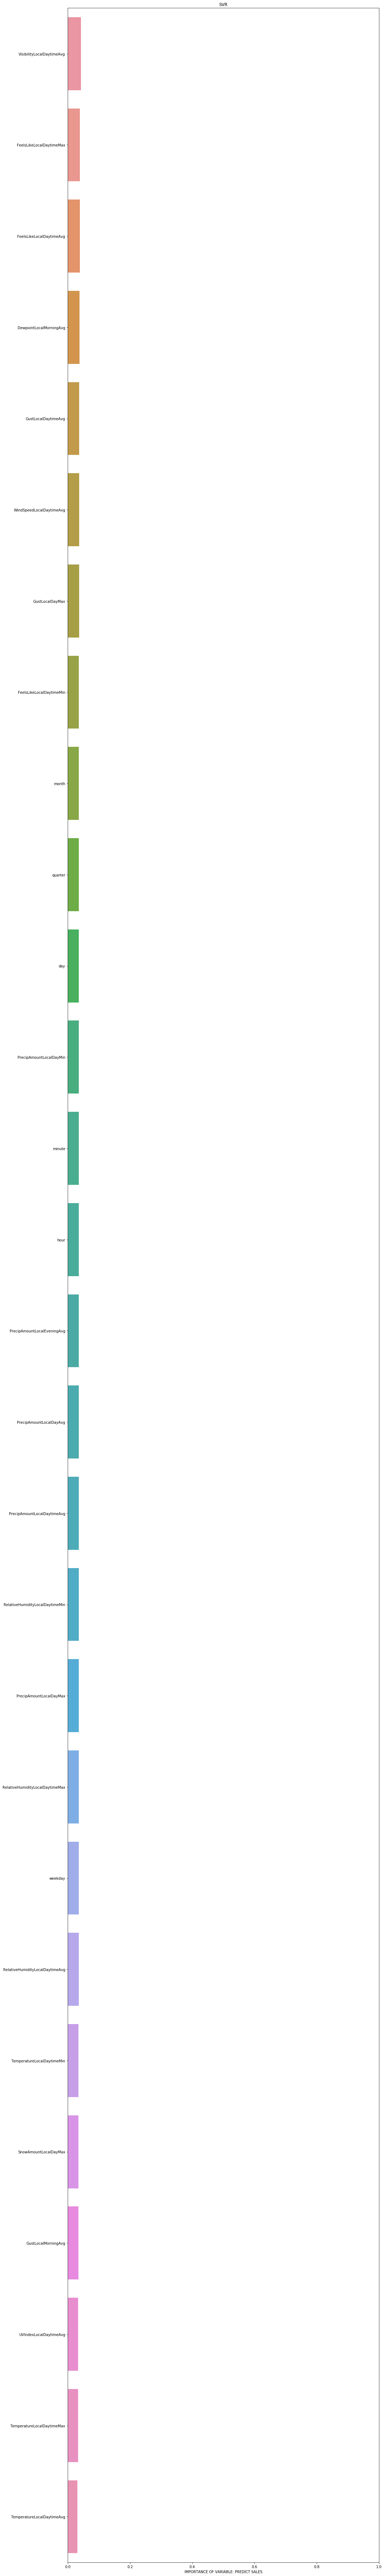

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 3115.9700710779102, 'mape': inf, 'rms': 5225.311612102443, 'mse': 27303881.443572633, 'vs': 0.6962815100754434, 'r2': 0.6962070348495915}


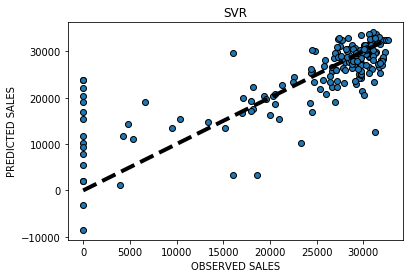

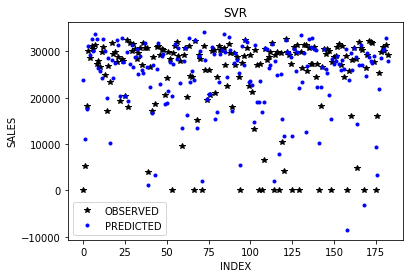

permuted neg_median_absolute_error: -2252.4376662233344 (p = 0.09090909090909091, n = 10)


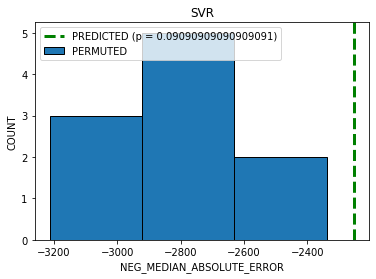

clientname_demo_('094352',) sales RANDOMFOREST 622.1966666666667


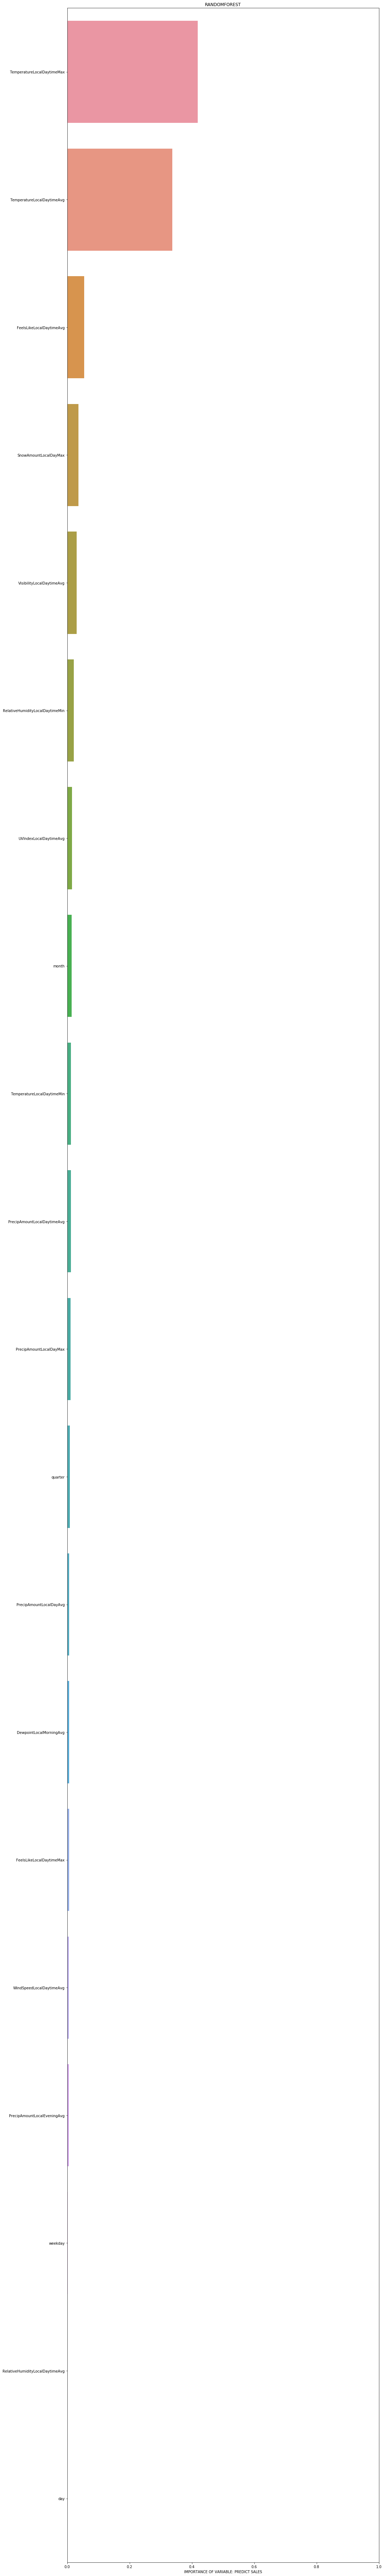

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 1189.41116575592, 'mape': nan, 'rms': 2168.7836129980337, 'mse': 4703622.360008804, 'vs': 0.9482228303474785, 'r2': 0.947665778338222}


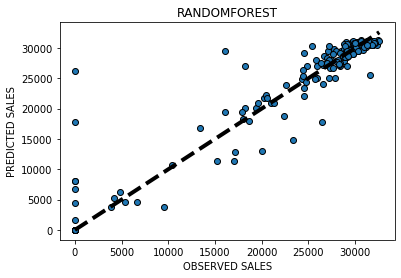

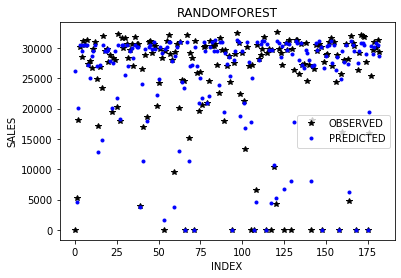

permuted neg_median_absolute_error: -769.2081666666679 (p = 0.09090909090909091, n = 10)


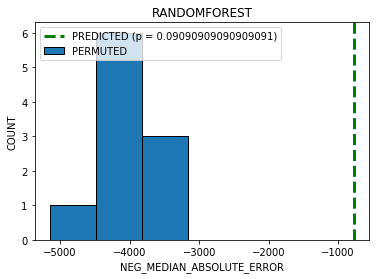

clientname_demo_('096468',) sales SVR 1149.370325812146


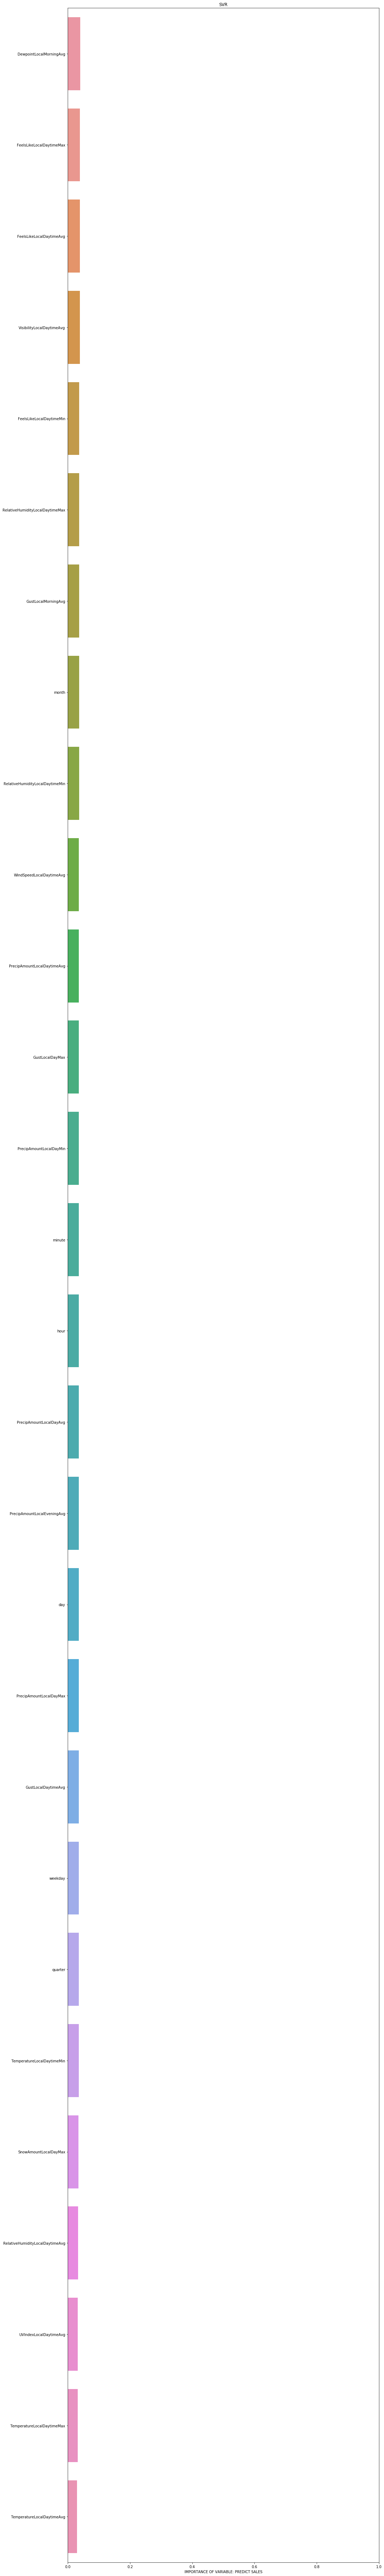

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 3552.0922143546995, 'mape': inf, 'rms': 7169.83926533299, 'mse': 51406595.09071071, 'vs': 0.3729479632778282, 'r2': 0.30085565325417607}


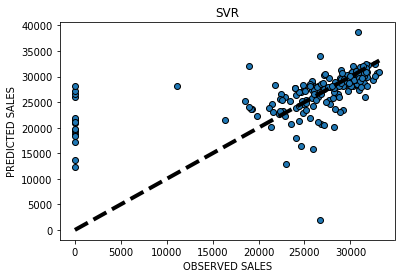

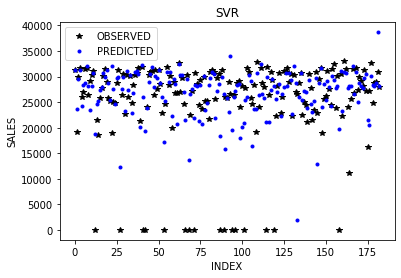

permuted neg_median_absolute_error: -1854.45630034684 (p = 0.09090909090909091, n = 10)


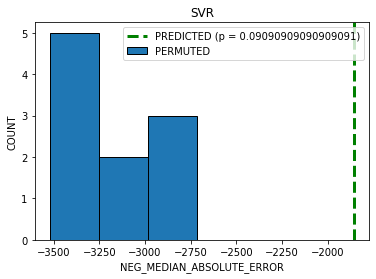

clientname_demo_('096468',) sales RANDOMFOREST 485.96000000000276


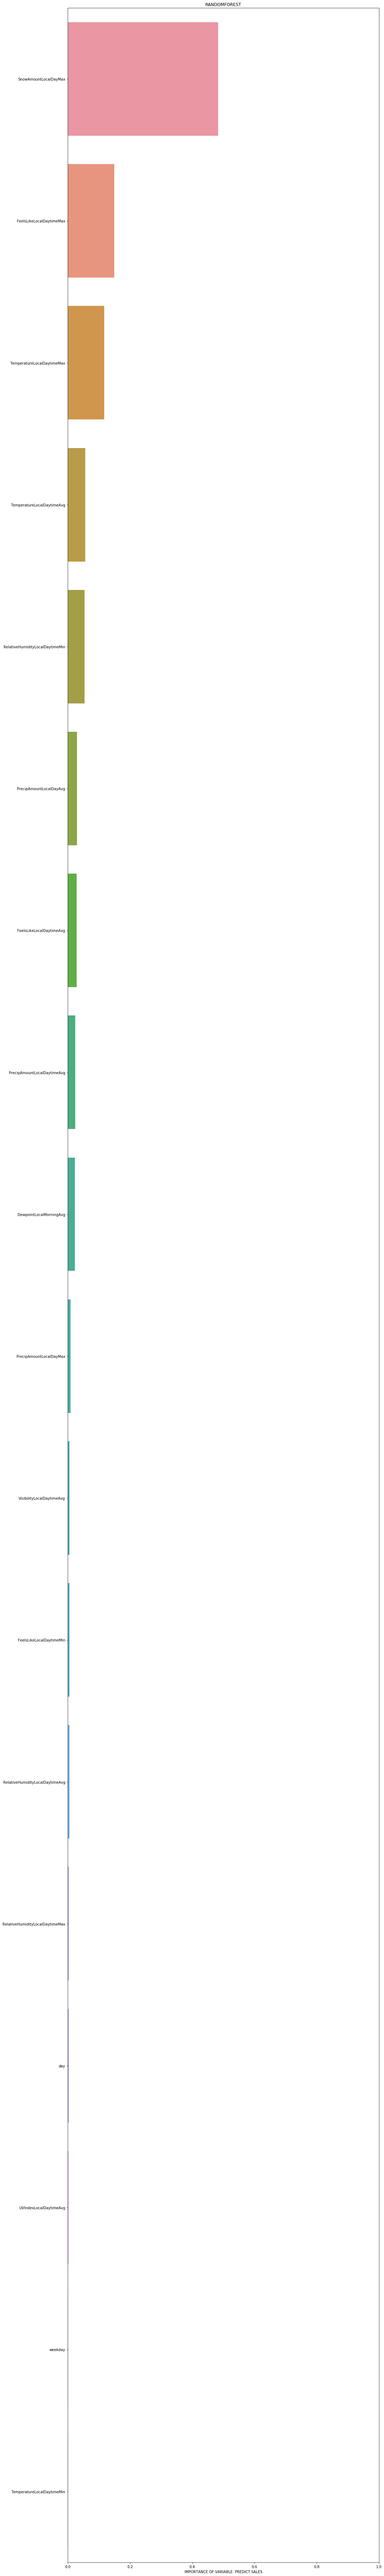

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 646.2619125683063, 'mape': nan, 'rms': 997.428047827718, 'mse': 994862.7105934126, 'vs': 0.9865287716307201, 'r2': 0.9864695835491096}


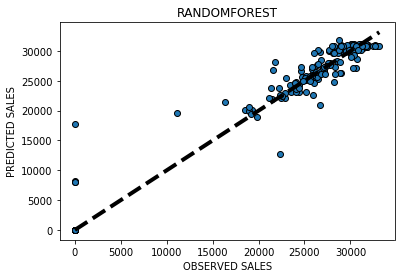

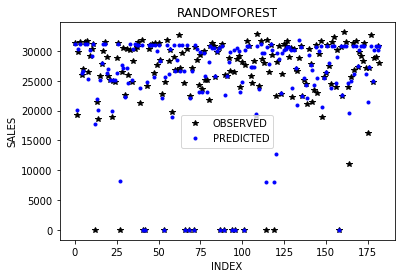

permuted neg_median_absolute_error: -693.516666666665 (p = 0.09090909090909091, n = 10)


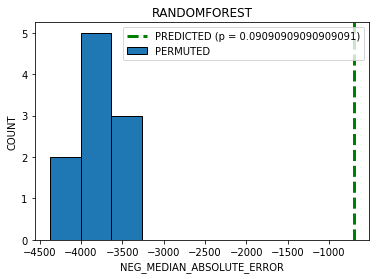

DONE: EVALMODELS_BUILD!
elapsed time of evalmodels_build: 25.164743900299072
DONE: 'STEP 2.1: Build Predictive Models' Work


In [6]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE STRATIFIED DATASETS
# ----------------------------------------------------------------------------------------------------------------------

#
ttic = time.time()
datastrata = makedatastrata(df, "demo", list_keepyears_build)
ttoc = time.time()
print("elapsed time of makedatastrata:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE MODELS
# ----------------------------------------------------------------------------------------------------------------------

# compute models
ttic = time.time()
results_modelsbuild = makemodels(datastrata[0:3], list_mla)
ttoc = time.time()
print("elapsed time of makemodels:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE "MODEL EVALUATION" RESULTS
# ----------------------------------------------------------------------------------------------------------------------

# compute related plots
ttic = time.time()
results_evaluatebuild = evalmodels_build(datastrata[0:3], results_modelsbuild)
ttoc = time.time()
print("elapsed time of evalmodels_build:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models' Work")


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
namedata,object,3.0,30,0.0,0.0,0.0,NaN,"clientname_demo_('078152',)","clientname_demo_('096468',)",NaN
vardependent,object,1.0,30,0.0,0.0,0.0,NaN,sales,sales,NaN
namemla,object,2.0,30,0.0,0.0,0.0,NaN,RANDOMFOREST,SVR,NaN
score_time,float64,30.0,30,0.0,0.0,0.0,0.000000,0.00220251,0.00448918,6.035929
test_explained_variance,float64,30.0,30,0.0,0.0,0.0,0.033333,-0.156588,0.991814,0.277044
estimator,object,30.0,30,0.0,0.0,0.0,NaN,"RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',\n max_depth=5, max_features=20, max_leaf_nodes=None,\n max_samples=None, min_impurity_decrease=0.0,\n min_impurity_split=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=3, n_jobs=None, oob_score=False,\n random_state=None, verbose=0, warm_start=False)","SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',\n kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)",NaN
train_neg_mean_absolute_error,float64,30.0,30,0.0,0.0,0.0,1.000000,-3629.61,-642.251,-1.892888
variables_importances,object,NaN,30,0.0,0.0,0.0,NaN,"[(DewpointLocalMorningAvg, 0.039435029968644626), (VisibilityLocalDaytimeAvg, 0.03931847597765536), (FeelsLikeLocalDaytimeMax, 0.038914927487128596), (FeelsLikeLocalDaytimeAvg, 0.03815383022628415), (GustLocalMorningAvg, 0.03746919978170144), (FeelsLikeLocalDaytimeMin, 0.03642685680542658), (month, 0.03630462715891671), (RelativeHumidityLocalDaytimeMin, 0.03627902724026025), (RelativeHumidityLocalDaytimeMax, 0.03600283656304919), (WindSpeedLocalDaytimeAvg, 0.03595712547044574), (PrecipAmountLocalDaytimeAvg, 0.03588946423156139), (GustLocalDayMax, 0.03587164033818932), (PrecipAmountLocalDayMin, 0.035871640338189306), (minute, 0.035871640338189306), (hour, 0.035871640338189306), (PrecipAmountLocalDayAvg, 0.0358451405018456), (PrecipAmountLocalEveningAvg, 0.035789530384457376), (weekday, 0.03577175880235369), (day, 0.035742566058849824), (PrecipAmountLocalDayMax, 0.03562719960923702), (TemperatureLocalDaytimeMin, 0.035090976351850094), (quarter, 0.034875097506353016), (GustLocalDaytimeAvg, 0.03440137916887069), (RelativeHumidityLocalDaytimeAvg, 0.03321884515014992), (SnowAmountLocalDayMax, 0.03316442364810561), (UVIndexLocalDaytimeAvg, 0.03299693376131586), (TemperatureLocalDaytimeMax, 0.03296750762260926), (TemperatureLocalDaytimeAvg, 0.030870679170171004)]","[(VisibilityLocalDaytimeAvg, 0.04396393699819174), (FeelsLikeLocalDaytimeAvg, 0.03957841009856338), (FeelsLikeLocalDaytimeMax, 0.038030182971583344), (WindSpeedLocalDaytimeAvg, 0.03721762484607912), (DewpointLocalMorningAvg, 0.03719084308058713), (FeelsLikeLocalDaytimeMin, 0.03634603282359542), (month, 0.03622551782583348), (GustLocalDaytimeAvg, 0.03585434213661239), (RelativeHumidityLocalDaytimeMax, 0.03565965053835279), (PrecipAmountLocalDayMin, 0.035592969127817155), (minute, 0.035592969127817155), (hour, 0.035592969127817155), (GustLocalDayMax, 0.03555968942620405), (day, 0.03552535080368745), (PrecipAmountLocalEveningAvg, 0.0355177811794004), (PrecipAmountLocalDaytimeAvg, 0.03551621545173584), (PrecipAmountLocalDayAvg, 0.03551574981062056), (weekday, 0.0354688627567429), (RelativeHumidityLocalDaytimeMin, 0.03543448174780602), (GustLocalMorningAvg, 0.03533836287369859), (quarter, 0.035332488856332674), (PrecipAmountLocalDayMax, 0.035173575475091624), (TemperatureLocalDaytimeMin, 0.03487870315703553), (RelativeHumidityLocalDaytimeAvg, 0.03455546219091106), (TemperatureLocalDaytimeMax, 0.03331049501574232), (SnowAmountLocalDayMax, 0.03322736382583993), (UVIndexLocalDaytimeAvg, 0.03235236635388434), (TemperatureLocalDaytimeAvg, 0.030447602372416095)]",NaN
train_explained_variance,float64,30.0,30,0.0,0.0,0.0,0.000000,0.308061,0.983906,-1.403597
fit_time,float64,30.0,30,0.0,0.0,0.0,0.000000,0.0122051,0.160883,2.013142


,namedata,vardependent,namemla,score_time,test_explained_variance,estimator,train_neg_mean_absolute_error,variables_importances,train_explained_variance,fit_time,train_neg_median_absolute_error,train_r2,test_r2,test_neg_median_absolute_error,test_neg_mean_absolute_error
0,"clientname_demo_('078152',)",sales,SVR,0.003745,0.294333,"SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',\n kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)",-3007.893390,"[(TemperatureLocalDaytimeMax, 0.04053894284309991), (FeelsLikeLocalDaytimeMin, 0.03972782215932079), (TemperatureLocalDaytimeAvg, 0.038865929347282724), (VisibilityLocalDaytimeAvg, 0.0382735120888252), (quarter, 0.037023356500815056), (RelativeHumidityLocalDaytimeAvg, 0.03658345070284379), (GustLocalMorningAvg, 0.036359545509545926), (WindSpeedLocalDaytimeAvg, 0.03633347110908686), (RelativeHumidityLocalDaytimeMax, 0.035739474225122594), (GustLocalDayMax, 0.0356895040679337), (GustLocalDaytimeAvg, 0.0356895040679337), (PrecipAmountLocalDayMin, 0.0356895040679337), (minute, 0.0356895040679337), (hour, 0.0356895040679337), (PrecipAmountLocalDaytimeAvg, 0.03559147571354172), (PrecipAmountLocalEveningAvg, 0.035588640168018354), (PrecipAmountLocalDayAvg, 0.03558168031469183), (RelativeHumidityLocalDaytimeMin, 0.035526477074784124), (SnowAmountLocalDayMax, 0.03544154763123006), (day, 0.03539270470955171), (month, 0.035070848129996876), (PrecipAmountLocalDayMax, 0.034826172976281676), (weekday, 0.03471779118954345), (DewpointLocalMorningAvg, 0.034046889590184315), (FeelsLikeLocalDaytimeMax, 0.033925223336368306), (FeelsLikeLocalDaytimeAvg, 0.03233972137663331), (TemperatureLocalDaytimeMin, 0.03218607493869486), (UVIndexLocalDaytimeAvg, 0.031871728024867964)]",0.407117,0.028998,-2138.992426,0.386925,0.284359,-2114.174843,-2702.262834
1,"clientname_demo_('078152',)",sales,SVR,0.002203,0.159542,"SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',\n kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)",-2664.280839,"[(FeelsLikeLocalDaytimeMin, 0.04041997221293972), (TemperatureLocalDaytimeMax, 0.040073852100053944), (TemperatureLocalDaytimeAvg, 0.03888623034724053), (VisibilityLocalDaytimeAvg, 0.03845018544773797), (RelativeHumidityLocalDaytimeAvg, 0.037082461590197756), (quarter, 0.036383206493376945), (WindSpeedLocalDaytimeAvg, 0.03636151707186145), (GustLocalMorningAvg, 0.036082207228438974), (GustLocalDayMax, 0.035698680768631516), (GustLocalDaytimeAvg, 0.035698680768631495), (PrecipAmountLocalDayMin, 0.035698680768631495), (SnowAmountLocalDayMax, 0.035698680768631495), (minute, 0.035698680768631495), (hour, 0.035698680768631495), (PrecipAmountLocalDaytimeAvg, 0.03561089921231399), (PrecipAmountLocalDayAvg, 0.03557469190341181), (PrecipAmountLocalEveningAvg, 0.035563808450810766), (RelativeHumidityLocalDaytimeMax, 0.0354645699334915), (day, 0.03535153361713366), (RelativeHumidityLocalDaytimeMin, 0.03512801355669164), (weekday, 0.034911211015020205), (month, 0.03478995089331413), (PrecipAmountLocalDayMax, 0.03469299851226812), (DewpointLocalMorningAvg, 0.03412790548405473), (FeelsLikeLocalDaytimeMax, 0.033795774461427695), (UVIndexLocalDaytimeAvg, 0.03281344651708973), (FeelsLikeLocalDaytimeAvg, 0.032601633189820255), (TemperatureLocalDaytimeMin, 0.03164184614951538)]",0.454085,0.049969,-1859.867496,0.440655,0.104012,-2654.526838,-3947.768658
2,"clientname_demo_('078152',)",sales,SVR,0.002315,0.355371,"SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',\n kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)",-2750.595456,"[(TemperatureLocalDaytimeAvg, 0.0409000395366887), (TemperatureLocalDaytimeMax, 0.04000227985641977), (FeelsLikeLocalDaytimeMin, 0.039846677519933565), (RelativeHumidityLocalDaytimeAvg, 0.037223765950306235), (quarter, 0.03692228681375041), (VisibilityLocalDaytimeAvg, 0.03680721854689897), (WindSpeedLocalDaytimeAvg, 0.03617112958710633), (GustLocal

(30, 15)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aed664780>,
      dtype=object)

DONE: 'STEP 2.1: Build Predictive Models then Examine Predictive Build Model Performance' Work


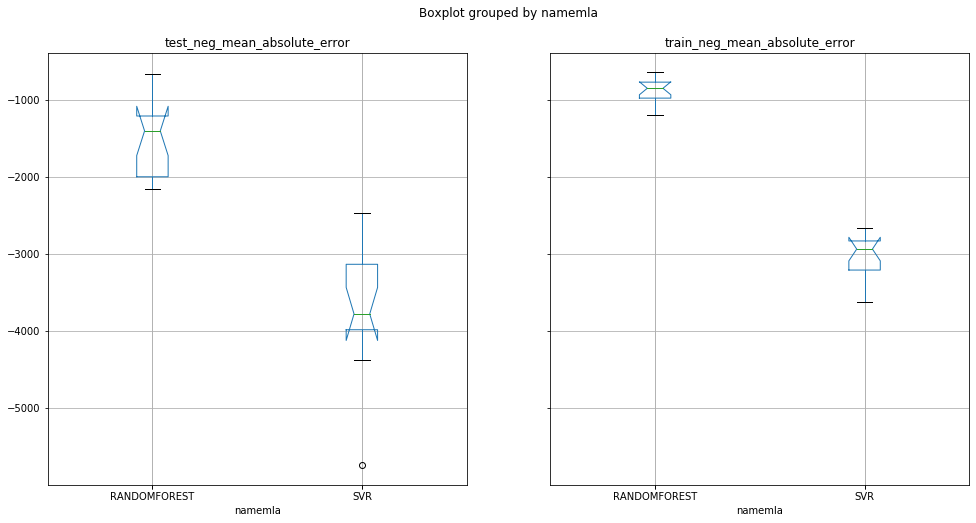

In [7]:
# ----------------------------------------------------------------------------------------------------------------------
# DISPLAY "MODEL EVALUATION" RESULTS
# ----------------------------------------------------------------------------------------------------------------------

# #
# savefile = "/project_data/data_asset/buildmodels_performances.csv"

#
list_columnsfirst = ["namedata", "vardependent", "namemla"]

#
dfP = pd.DataFrame({})

for ii in results_modelsbuild:
    dfTemp = pd.DataFrame(ii["cvresults_models"])
    dfTemp["namedata"] = ii["name_data"]
    dfTemp["namemla"] = ii["name_mla"]
    dfTemp["vardependent"] = ii["variable_dependent"]
    dfP = pd.concat([dfP, dfTemp], axis=0)
    
dfP = dfP.loc[:, list_columnsfirst + list(set(dfP.columns) - set(list_columnsfirst))]

# confirm table
mydfdescribe(dfP)
display(dfP)
dfP.shape

# # save table
# dfP.to_csv(savefile, sep=",", header=True, index=False)


#
list_plotmetrics = ["test_neg_mean_absolute_error", "train_neg_mean_absolute_error"]

dfP.boxplot(column=list_plotmetrics, by="namemla", notch=True, figsize=(16,8))

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models then Examine Predictive Build Model Performance' Work")


# STEP 2.2: Save Predictive Models

This step saves the best predictive models of STEP 2.1 to IBM CP4D (IBM Cloud Pak for Data) platform for both archived results and prospective deployed operationalization. The completion of this step entails the creation of a deployment workspace (space). WML (Watson Machine Learning) provides deployment spaces to save, configure, and deploy computed predictive models. Additionally, the workspace permits the saving of code assets and data assets as well as models. The following bullets and corresponding cells involve saving then deploying models by leveraging the *watson_machine_learning_client* package to complete this STEP 2.2 process.

 1. Use the predefined workspace-related configuration file values to create the deployment space.
 2. Create the deployment space.
 3. Store the models and their details in the space.
 4. Deploy the models for future operationalized use (e.g., see the *applypredictivemodelsScikitlearn* notebook) in the space.
 5. Store the "model data scaler" info from the earlier "build models" process as a *data_asset* file.


### Create the Deployment Space

Create a new deployment space. Use the name of the space as specified in the user inputs cell above. A default tag for the space is specified in the space metadata. This tag will be used in the future to identify this space. If a space with specified space_name already exists, a new space with the same name is created. Set this deployment space as the default space.

In [8]:
# ----------------------------------------------------------------------------------------------------------------------
# CREATE THE DEPLOYMENT SPACE
# ----------------------------------------------------------------------------------------------------------------------

# create the WML api client
client = WatsonMachineLearningAPIClient(wml_credentials)

# create space nametag
space_nametag = space_name.replace("space", "")

# create the space and set it as default
space_metadata = {
        client.spaces.ConfigurationMetaNames.NAME : space_name,
        client.spaces.ConfigurationMetaNames.TAGS : [{"value": "{}_space".format(space_nametag)}]
}

space_storeddetails = client.spaces.store(space_metadata)

space_uid = space_storeddetails["metadata"]["guid"]

client.set.default_space(space_uid)


'SUCCESS'

### Store the Models then Deploy the Models

Store the models in the deployment space repository, specifying a default tag per model via its model storage metadata.
Deploy the stored models, again specifying a default tag per model deployment via its model delopyment metadata. 
Subsequently, these tags will have future use to identify the model storages and model deployments.

In [9]:
# ----------------------------------------------------------------------------------------------------------------------
# STORE MODELS THEN DEPLOY MODELS
# ----------------------------------------------------------------------------------------------------------------------

#
results_modelsbuild_onemla = [ii for ii in results_modelsbuild if (ii["name_mla"].lower() == "randomforest")]

#
dict_modeldatascaler = {}

#
for results_modelnow in results_modelsbuild_onemla:
        
    # make model nameid
    model_nameid = "{}_{}".format(results_modelnow["name_data"], results_modelnow["name_mla"])
    
    # make model nameidtag
    model_nameidtag = model_nameid.replace("_store", "").replace("_deploy", "").replace("(", "").replace(")", "").replace(",", "-").replace("'", "")
    
    # get model
    model = results_modelnow["cvresults_modelbest"]["estimator"]
    
    # get model data scaler
    modeldatascaler = results_modelnow["datascaler"]
    dict_modeldatascaler[model_nameid] = modeldatascaler

    # get independent variables list
    list_variablesindependent = results_modelnow["variables_independent"]
    
    # ----------------------------------------------------------------------------------------------------------------------
    # STORE MODELS
    # ----------------------------------------------------------------------------------------------------------------------

    #
    print("Storing Model {}: name as {}; nametag as {}".format(model_nameid, model_nameid, model_nameidtag + "_store"))

    # make store model metadata
    metadata_modelstore = {
        client.repository.ModelMetaNames.SPACE_UID: space_uid,
        client.repository.ModelMetaNames.NAME: model_nameid,
        client.repository.ModelMetaNames.TAGS: [{"value": "{}_store".format(model_nameidtag)}],
        client.repository.ModelMetaNames.TYPE: "scikit-learn_0.22",
        client.repository.ModelMetaNames.RUNTIME_UID: "scikit-learn_0.22-py3.6"}
    
    # store the model
    modelstored = client.repository.store_model(model=model, meta_props=metadata_modelstore, 
                                                training_data=None, training_target=None, feature_names=list_variablesindependent, 
                                                                           pipeline=modeldatascaler)
    
    # ----------------------------------------------------------------------------------------------------------------------
    # DEPLOY MODELS
    # ----------------------------------------------------------------------------------------------------------------------

    #
    print("Deploying Model {}: name as {}; nametag as {}".format(model_nameid, model_nameidtag, model_nameidtag + "_deploy"))
    
    # make deploy model metadata
    metadata_modeldeploy = {
        client.deployments.ConfigurationMetaNames.SPACE_UID: space_uid,
        client.deployments.ConfigurationMetaNames.NAME: model_nameidtag,
        client.deployments.ConfigurationMetaNames.TAGS : [{"value": "{}_deploy".format(model_nameidtag)}],
        client.deployments.ConfigurationMetaNames.ONLINE: {}}
        
    # deploy the model
    client.deployments.create(artifact_uid=modelstored["metadata"]["guid"], meta_props=metadata_modeldeploy)


# ----------------------------------------------------------------------------------------------------------------------
# STORE MODEL DATA SCALER INFO
# ----------------------------------------------------------------------------------------------------------------------

# save model data scalers as a file
# note: mimetype is guessed when promoting the asset into the deployment space; 
#     : thus save the object as a file type recognised by the mimetype library;
#     : this hack does not impact the object type currenlty fortunately
# joblib.dump(dict_modeldatascaler, "/project_data/data_asset/dict_modeldatascaler.json")
with open("/project_data/data_asset/dict_modeldatascaler.json", "w") as f:
    json.dump(dict_modeldatascaler, f)



Storing Model clientname_demo_('078152',)_RANDOMFOREST: name as clientname_demo_('078152',)_RANDOMFOREST; nametag as clientname_demo_078152-_RANDOMFOREST_store
Deploying Model clientname_demo_('078152',)_RANDOMFOREST: name as clientname_demo_078152-_RANDOMFOREST; nametag as clientname_demo_078152-_RANDOMFOREST_deploy


#######################################################################################

Synchronous deployment creation for uid: '4e1186ff-deb6-4a77-b5ba-866fc770235b' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7f36d0aa-660f-43c2-b7c0-a616cd416591'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'href': '/v4/models/4e1186ff-deb6-4a77-b5ba-866fc770235b?space_id=8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
   'id': '4e1186ff-deb6-4a77-b5ba-866fc770235b'},
  'custom': {},
  'description': '',
  'name': 'clientname_demo_078152-_RANDOMFOREST',
  'online': {},
  'space': {'href': '/v4/spaces/8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
   'id': '8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a'},
  'space_id': '8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
  'status': {'online_url': {'url': 'https://internal-nginx-svc:12443/v4/deployments/7f36d0aa-660f-43c2-b7c0-a616cd416591/predictions'},
   'state': 'ready'},
  'tags': [{'value': 'clientname_demo_078152-_RANDOMFOREST_deploy'}]},
 'metadata': {'created_at': '2020-06-15T11:09:54.999Z',
  'description': '',
  'guid': '7f36d0aa-660f-43c2-b7c0-a616cd416591',
  'href': '/v4/deployments/7f36d0aa-660f-43c2-b7c0-a616cd416591',
  'id': '7f36d0aa-660f-43c2-b7c0-a616cd416591',
  'modified_at': '2020-06-15T11:09:54.999Z',
  'name': 'clientname_demo_078

Storing Model clientname_demo_('094352',)_RANDOMFOREST: name as clientname_demo_('094352',)_RANDOMFOREST; nametag as clientname_demo_094352-_RANDOMFOREST_store
Deploying Model clientname_demo_('094352',)_RANDOMFOREST: name as clientname_demo_094352-_RANDOMFOREST; nametag as clientname_demo_094352-_RANDOMFOREST_deploy


#######################################################################################

Synchronous deployment creation for uid: '1b444304-f946-427b-97f1-5988e19bb946' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ffc35793-5525-4d56-a2e4-6a323760ac2d'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'href': '/v4/models/1b444304-f946-427b-97f1-5988e19bb946?space_id=8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
   'id': '1b444304-f946-427b-97f1-5988e19bb946'},
  'custom': {},
  'description': '',
  'name': 'clientname_demo_094352-_RANDOMFOREST',
  'online': {},
  'space': {'href': '/v4/spaces/8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
   'id': '8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a'},
  'space_id': '8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
  'status': {'online_url': {'url': 'https://internal-nginx-svc:12443/v4/deployments/ffc35793-5525-4d56-a2e4-6a323760ac2d/predictions'},
   'state': 'ready'},
  'tags': [{'value': 'clientname_demo_094352-_RANDOMFOREST_deploy'}]},
 'metadata': {'created_at': '2020-06-15T11:10:02.732Z',
  'description': '',
  'guid': 'ffc35793-5525-4d56-a2e4-6a323760ac2d',
  'href': '/v4/deployments/ffc35793-5525-4d56-a2e4-6a323760ac2d',
  'id': 'ffc35793-5525-4d56-a2e4-6a323760ac2d',
  'modified_at': '2020-06-15T11:10:02.732Z',
  'name': 'clientname_demo_094

Storing Model clientname_demo_('096468',)_RANDOMFOREST: name as clientname_demo_('096468',)_RANDOMFOREST; nametag as clientname_demo_096468-_RANDOMFOREST_store
Deploying Model clientname_demo_('096468',)_RANDOMFOREST: name as clientname_demo_096468-_RANDOMFOREST; nametag as clientname_demo_096468-_RANDOMFOREST_deploy


#######################################################################################

Synchronous deployment creation for uid: '2fc7e3a0-e620-4afa-b1d2-78720834e21f' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b22bac1b-4096-4579-9b4e-8c419ece1f49'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'href': '/v4/models/2fc7e3a0-e620-4afa-b1d2-78720834e21f?space_id=8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
   'id': '2fc7e3a0-e620-4afa-b1d2-78720834e21f'},
  'custom': {},
  'description': '',
  'name': 'clientname_demo_096468-_RANDOMFOREST',
  'online': {},
  'space': {'href': '/v4/spaces/8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
   'id': '8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a'},
  'space_id': '8ac9477d-b8ce-4d48-b73f-4e3477e3dc4a',
  'status': {'online_url': {'url': 'https://internal-nginx-svc:12443/v4/deployments/b22bac1b-4096-4579-9b4e-8c419ece1f49/predictions'},
   'state': 'ready'},
  'tags': [{'value': 'clientname_demo_096468-_RANDOMFOREST_deploy'}]},
 'metadata': {'created_at': '2020-06-15T11:10:09.762Z',
  'description': '',
  'guid': 'b22bac1b-4096-4579-9b4e-8c419ece1f49',
  'href': '/v4/deployments/b22bac1b-4096-4579-9b4e-8c419ece1f49',
  'id': 'b22bac1b-4096-4579-9b4e-8c419ece1f49',
  'modified_at': '2020-06-15T11:10:09.762Z',
  'name': 'clientname_demo_096